<a href="https://colab.research.google.com/github/ZarakiKanzaki/project-lunar-ML/blob/main/ExploratoryDataAnalysisScryfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis

### What's Scryfall?
Scryfall is a search engine for Magic cards. The website Scryfall.com was introduced on the World Wide Web in October 2016, claiming to be faster than similar sites. It also advertises as mobile-friendly, comprehensive, timely, and powerful. Subsequent development focused on expanding the database to include high-resolution scans and previously uncatalogued game features such as artwork, card backs, tokens, and extras.

In [ ]:
!pip install requests
import requests
import json

url = "https://api.scryfall.com/bulk-data/oracle_cards"

response = requests.get(url)

In [ ]:
if response.status_code == 200:
    data = response.json()
    print(json.dumps(data.get("download_uri"), indent=2))

"https://data.scryfall.io/oracle-cards/oracle-cards-20231125100144.json"


In [ ]:
    download_uri = data.get("download_uri")
    if download_uri:
        download_response = requests.get(download_uri)

        if download_response.status_code == 200:
            with open("bulk-files.json", "wb") as file:
                file.write(download_response.content)
            print("File downloaded successfully.")
        else:
            print(f"Failed to download file. Status code: {download_response.status_code}")
    else:
        print("No 'download_uri' found in the JSON data.")


File downloaded successfully.


The first thing we need to do with these bulk files is to clean them with pandas

In [ ]:
import pandas as pd
df = pd.read_json("bulk-files.json")

df = df[df['border_color'] != 'silver ']
desired_categories = ['normal', 'saga', 'meld', "prototype", "transform", "split", "adventure", "flip", "modal_dfc", "leveler", "class"]
df = df[df['layout'].isin(desired_categories)]

df = df.drop(["oracle_id","multiverse_ids","mtgo_id","mtgo_foil_id","tcgplayer_id","cardmarket_id","released_at","uri","scryfall_uri","highres_image","image_status","image_uris","lang","cmc","colors","color_identity","reserved","foil","nonfoil","finishes","oversized","promo","games",
"reprint", "variation", "set_id", "set", "set_name", "set_type", "set_uri", "set_search_uri", "scryfall_set_uri", "rulings_uri", "prints_search_uri","collector_number","digital","rarity","card_back_id","artist","artist_ids","illustration_id","flavor_text",
"frame","full_art","textless","booster","story_spotlight","edhrec_rank","prices","related_uris","purchase_uris","security_stamp","preview","penny_rank","arena_id","all_parts","frame_effects","watermark","produced_mana","tcgplayer_etched_id","promo_types",
"life_modifier","hand_modifier","attraction_lights","color_indicator","content_warning"], axis=1)

df = df[df['legalities'].apply(lambda x: x.get('vintage', '') == 'legal')]

In [ ]:
df.head()

object                                    id                 name  layout  \
0   card  86bf43b1-8d4e-4759-bb2d-0b2e03ba7012           Static Orb  normal   
1   card  7050735c-b232-47a6-a342-01795bfd0d46  Sensory Deprivation  normal   
2   card  e718b21b-46d1-4844-985c-52745657b1ac       Road of Return  normal   
3   card  036ef8c9-72ac-46ce-af07-83b79d736538           Storm Crow  normal   
4   card  b125d1e7-5d9b-4997-88b0-71bdfc19c6f2       Walking Sponge  normal   

  mana_cost           type_line  \
0       {3}            Artifact   
1       {U}  Enchantment — Aura   
2    {G}{G}             Sorcery   
3    {1}{U}     Creature — Bird   
4    {1}{U}   Creature — Sponge   

                                         oracle_text   keywords  \
0  As long as Static Orb is untapped, players can...         []   
1   Enchant creature\nEnchanted creature gets -3/-0.  [Enchant]   
2  Choose one —\n• Return target permanent card f...  [Entwine]   
3  Flying (This creature can't be blocked except ...   [Flying]   
4  {T}: Target creature loses your choice of flyi...         []   

                                          legalities border_color power  \
0  {'standard': 'not_legal', 'future': 'not_legal...        white   NaN   
1  {'standard': 'not_legal', 'future': 'not_legal...        black   NaN   
2  {'standard': 'not_legal', 'future': 'not_legal...        black   NaN   
3  {'standard': 'not_legal', 'future': 'not_legal...        white     1   
4  {'standard': 'not_legal', 'future': 'not_legal...        black     1   

  toughness card_faces loyalty  
0       NaN        NaN     NaN  
1       NaN        NaN     NaN  
2       NaN        NaN     NaN  
3         2        NaN     NaN  
4         1        NaN     NaN

In [ ]:
df.describe()

object                                    id        name  layout  \
count   26074                                 26074       26074   26074   
unique      1                                 26074       26074      11   
top      card  86bf43b1-8d4e-4759-bb2d-0b2e03ba7012  Static Orb  normal   
freq    26074                                     1           1   25273   

       mana_cost type_line oracle_text keywords  \
count      25665     26074       25445    26074   
unique       933      2903       24021     1910   
top                Instant                   []   
freq         941      2911         325    13963   

                                               legalities border_color  power  \
count                                               26074        26074  14094   
unique                                                333            3     21   
top     {'standard': 'not_legal', 'future': 'not_legal...        black      2   
freq                                                 1883        25370   4220   

       toughness                                         card_faces loyalty  
count      14094                                                629     266  
unique        24                                                629       8  
top            2  [{'object': 'card_face', 'name': 'Ulvenwald Ca...       4  
freq        3522                                                  1      92

## Card types

In Magic the Gathering we can identify two main tipes of Cards:


*   Permanents: As the name says, it's a group of cards that are going to stay on the battlefield until removed by specific effect.
Permanents types of cards contain:

            1. Creatures
            2. Artifacts
            3. Enchantments
            4. Lands
            5. Planeswalkers
            6. Battles


*   Non Permanents: It's a group of card that as they resolves they instantly go to the Graveyard. Non Permanents are:

            1. Sorceries
            2. Instants




### Permanent
> 110.1 <br> A permanent is a card or token on the battlefield. A permanent remains on the battlefield indefinitely. A card or token becomes a permanent as it enters the battlefield and it stops being a permanent as it’s moved to another zone by an effect or rule.


For more information about rulings about permanents, go to section [110](https://media.wizards.com/2023/downloads/MagicCompRules%2020231013.pdf#%5B%7B%22num%22%3A37%2C%22gen%22%3A0%7D%2C%7B%22name%22%3A%22XYZ%22%7D%2C88%2C571%2C0%5D) of the Comprehensive rule. <br>
Now I'm going to provide an example foreach type of Permanent.

This is an example of a creature card, as almost all of the following cards (aside from planeswalker) it has a blank loyalty value. You can find more rulings about Creatures [here](https://media.wizards.com/2023/downloads/MagicCompRules%2020231013.pdf#%5B%7B%22num%22%3A118%2C%22gen%22%3A0%7D%2C%7B%22name%22%3A%22XYZ%22%7D%2C88%2C375%2C0%5D).

In [ ]:
from IPython.display import Image, display
from tabulate import tabulate

url_images = 'https://api.scryfall.com/cards/named'
columns_to_display = ["name","layout","mana_cost","type_line","oracle_text", "power","toughness","loyalty"]

creature = requests.get(f"{url_images}?fuzzy=korvold+cursed&format=image&version=normal")

df[df['name']=='Korvold, Fae-Cursed King'][columns_to_display]

name  layout     mana_cost  \
18330  Korvold, Fae-Cursed King  normal  {2}{B}{R}{G}   

                               type_line  \
18330  Legendary Creature — Dragon Noble   

                                             oracle_text power toughness  \
18330  Flying\nWhenever Korvold, Fae-Cursed King ente...     4         4   

      loyalty  
18330     NaN

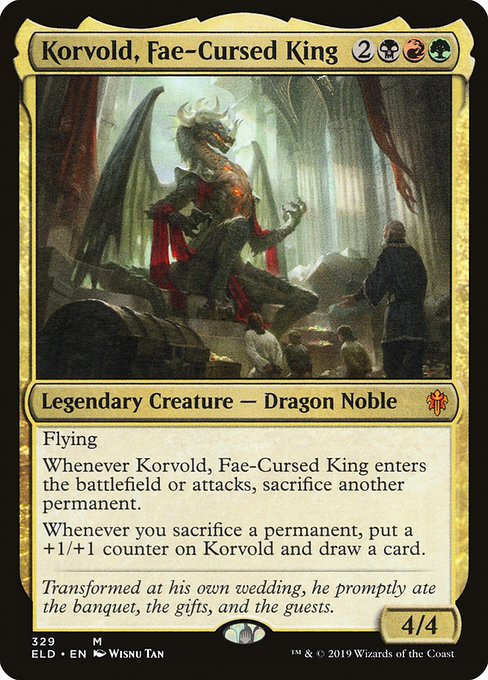

In [ ]:
display(Image(data=creature.content))

This is an example of an Artifact. In this case you can have mixed types of Artifacts, in fact you can have Artifact creatures, so you'll have mixed values for P/T (from now on I'll use P/T for Power/Toughness). More about rulings at the section [301](https://media.wizards.com/2023/downloads/MagicCompRules%2020231013.pdf#%5B%7B%22num%22%3A116%2C%22gen%22%3A0%7D%2C%7B%22name%22%3A%22XYZ%22%7D%2C88%2C522%2C0%5D) of the Comprehensive rules.



In [ ]:
artifact = requests.get(f"{url_images}?fuzzy=sol+ring&format=image&version=normal")
df[df['name']=='Sol Ring'][columns_to_display]

Empty DataFrame
Columns: [name, layout, mana_cost, type_line, oracle_text, power, toughness, loyalty]
Index: []

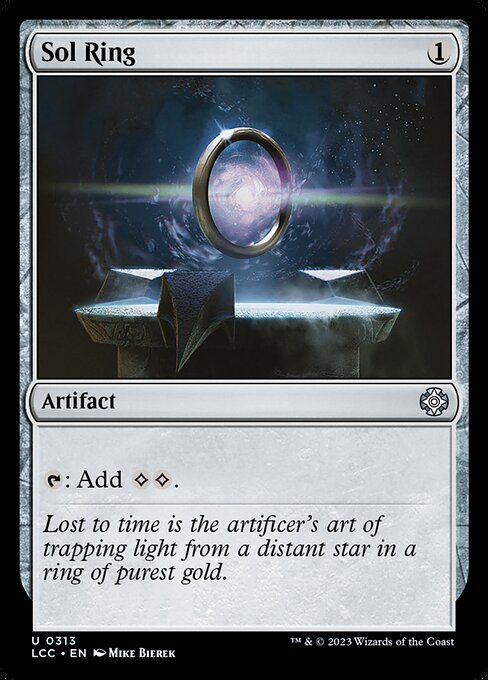

In [ ]:
display(Image(data=artifact.content))

This is an example of Enchantment. As the same as Artifact, there can be some mixed data such as Echantment creatures. For more about Enchantments' rulings, see the section [303](https://media.wizards.com/2023/downloads/MagicCompRules%2020231013.pdf#%5B%7B%22num%22%3A120%2C%22gen%22%3A0%7D%2C%7B%22name%22%3A%22XYZ%22%7D%2C88%2C571%2C0%5D) of the Comprehensive Rules.

In [ ]:
enchantment = requests.get(f"{url_images}?fuzzy=doubling+season&format=image&version=normal")
df[df['name']=='Doubling Season'][columns_to_display]

name  layout mana_cost    type_line  \
164  Doubling Season  normal    {4}{G}  Enchantment   

                                           oracle_text power toughness loyalty  
164  If an effect would create one or more tokens u...   NaN       NaN     NaN

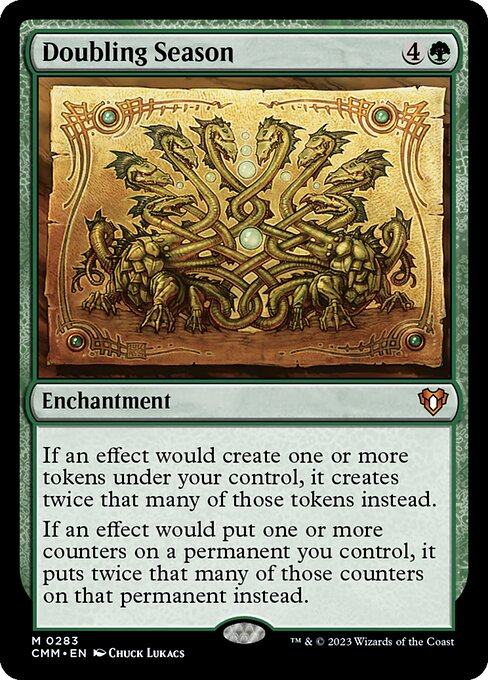

In [ ]:
display(Image(data=enchantment.content))

This is an example of a land, for more information see section [305](https://media.wizards.com/2023/downloads/MagicCompRules%2020231013.pdf#%5B%7B%22num%22%3A124%2C%22gen%22%3A0%7D%2C%7B%22name%22%3A%22XYZ%22%7D%2C88%2C651%2C0%5D) of the Comprehensive Rules.

In [ ]:
land = requests.get(f"{url_images}?fuzzy=forest&format=image&version=normal&set=who")
df[df['name']=='Forest'][columns_to_display]

name  layout mana_cost            type_line      oracle_text power  \
21221  Forest  normal            Basic Land — Forest  ({T}: Add {G}.)   NaN   

      toughness loyalty  
21221       NaN     NaN

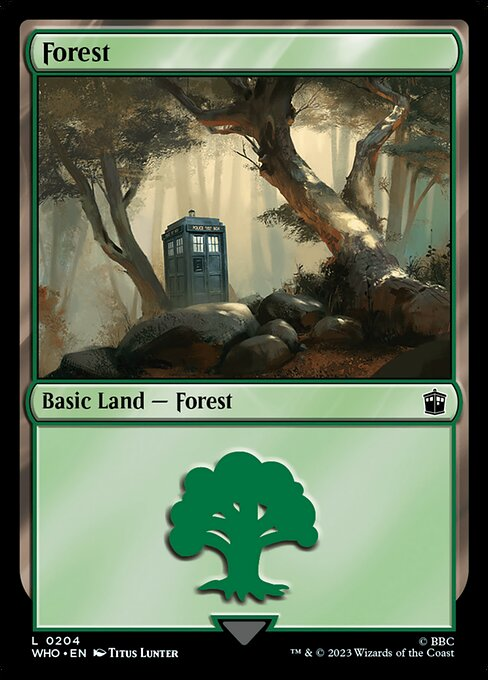

In [ ]:
display(Image(data=land.content))

This is an example of Planeswalker, in this case some of the data is missing, expecially because this specific type of card doesn't have any Power nor Toughness. For rulings, see section [306](https://media.wizards.com/2023/downloads/MagicCompRules%2020231013.pdf#%5B%7B%22num%22%3A126%2C%22gen%22%3A0%7D%2C%7B%22name%22%3A%22XYZ%22%7D%2C88%2C709%2C0%5D) of the Comprehensive Rules

In [ ]:
planesawalker = requests.get(f"{url_images}?fuzzy=nissa+shadowed&format=image&version=normal")
df[df['name']=='Nissa of Shadowed Boughs'][columns_to_display]


name  layout  mana_cost  \
2608  Nissa of Shadowed Boughs  normal  {2}{B}{G}   

                           type_line  \
2608  Legendary Planeswalker — Nissa   

                                            oracle_text power toughness  \
2608  Landfall — Whenever a land enters the battlefi...   NaN       NaN   

     loyalty  
2608       4

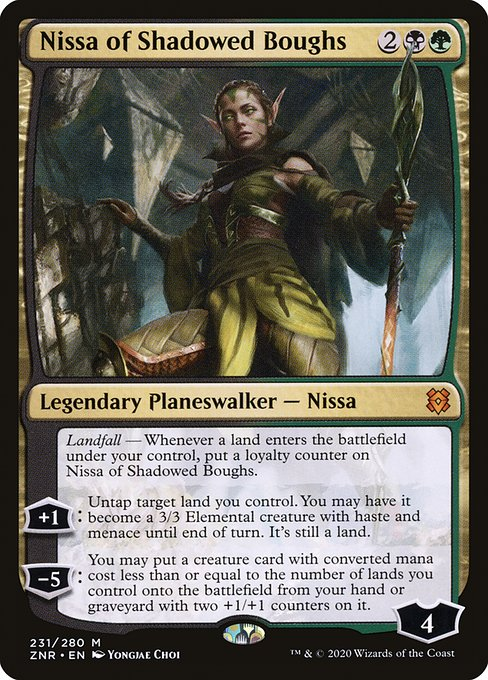

In [ ]:
display(Image(data=planesawalker.content))

Here's an example of battle. This specific type of card was introduced in the expansion *War of the Machines*. For more information about Battles see the section [310](https://media.wizards.com/2023/downloads/MagicCompRules%2020231013.pdf#%5B%7B%22num%22%3A130%2C%22gen%22%3A0%7D%2C%7B%22name%22%3A%22XYZ%22%7D%2C88%2C329%2C0%5D) of the Comprehensive rules.

In [ ]:
battle_face_front = requests.get(f"{url_images}?fuzzy=invasion+azgol&format=image&version=normal")
battle_face_back = requests.get(f"{url_images}?fuzzy=ashen+reaper&format=image&version=normal&face=back")
battle_face = pd.concat([pd.DataFrame(x) for x in df[df['name'].str.contains('Invasion of Azgol', case=False, na=False)]['card_faces']],
    ignore_index=True)

battle_face = battle_face.drop(["object","artist", 'artist_id', 'illustration_id', 'image_uris', 'flavor_name', 'color_indicator', 'flavor_text'], axis=1 )
battle_face

name mana_cost                    type_line  \
0  Invasion of Azgol    {B}{R}               Battle — Siege   
1       Ashen Reaper            Creature — Zombie Elemental   

                                         oracle_text  colors defense power  \
0  (As a Siege enters, choose an opponent to prot...  [B, R]       4   NaN   
1  Menace\nAt the beginning of your end step, put...  [B, R]     NaN     2   

  toughness  
0       NaN  
1         1

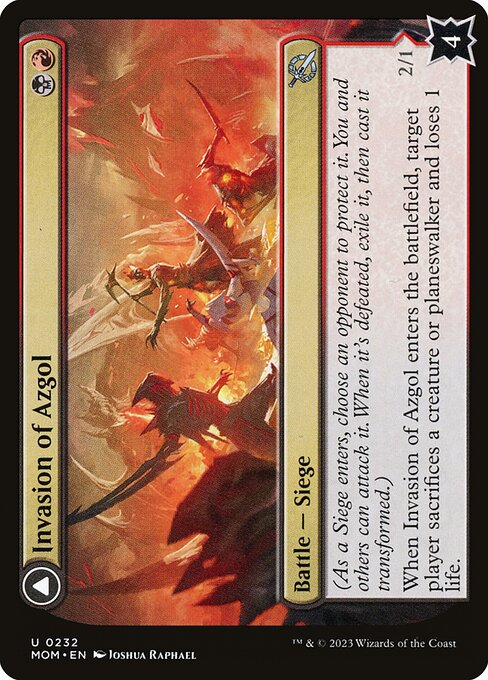

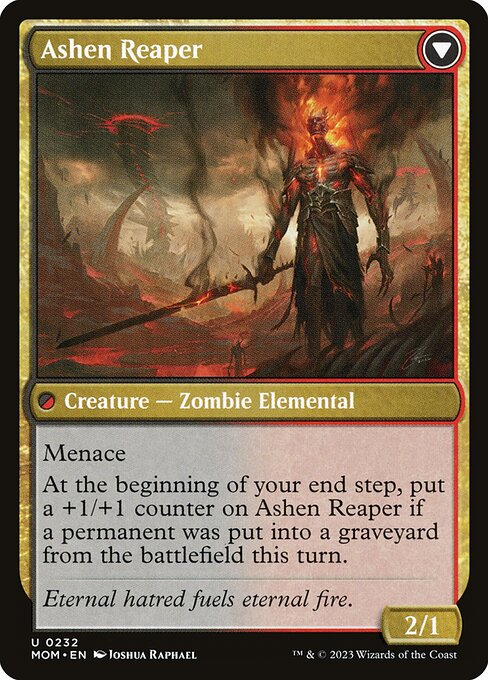

In [ ]:
display(Image(data=battle_face_front.content))
display(Image(data=battle_face_back.content))

### Instants and sorceries (Non Permanents)
Instants, like sorceries, represent one-shot or short-term magical spells. They are never put onto the battlefield; instead, they take effect when their mana cost is paid and the spell resolves, and then are immediately put into the player's graveyard.
The difference between the two is defined by their speed, in fact, Sorceries can be cast only during the main phases, while instant could be cast at any time.


> 610.1. <br> A one-shot effect does something just once and doesn’t have a duration. Examples include
dealing damage, destroying a permanent, creating a token, and moving an object from one zone to
another.


Here is an example of instant, for more information see section [304](https://media.wizards.com/2023/downloads/MagicCompRules%2020231013.pdf#%5B%7B%22num%22%3A122%2C%22gen%22%3A0%7D%2C%7B%22name%22%3A%22XYZ%22%7D%2C88%2C260%2C0%5D) of the Comprehensive rules.

In [ ]:
instant = requests.get(f"{url_images}?fuzzy=growth+spiral&format=image&version=normal&set=who")
df[df['name']=='Growth Spiral'][columns_to_display]

name  layout mana_cost type_line  \
6158  Growth Spiral  normal    {G}{U}   Instant   

                                            oracle_text power toughness  \
6158  Draw a card. You may put a land card from your...   NaN       NaN   

     loyalty  
6158     NaN

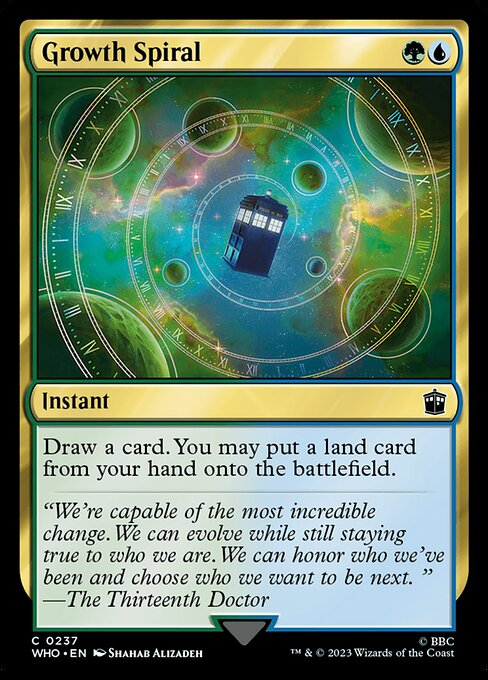

In [ ]:
display(Image(data=instant.content))

Here is an example of Sorcery, for more information see section [307](https://media.wizards.com/2023/downloads/MagicCompRules%2020231013.pdf#%5B%7B%22num%22%3A126%2C%22gen%22%3A0%7D%2C%7B%22name%22%3A%22XYZ%22%7D%2C88%2C145%2C0%5D) of the Comprehensive rules.

In [ ]:
sorcery = requests.get(f"{url_images}?fuzzy=explore&format=image&version=normal&set=sld")
df[df['name']=='Explore'][columns_to_display]

name  layout mana_cost type_line  \
21857  Explore  normal    {1}{G}   Sorcery   

                                             oracle_text power toughness  \
21857  You may play an additional land this turn.\nDr...   NaN       NaN   

      loyalty  
21857     NaN

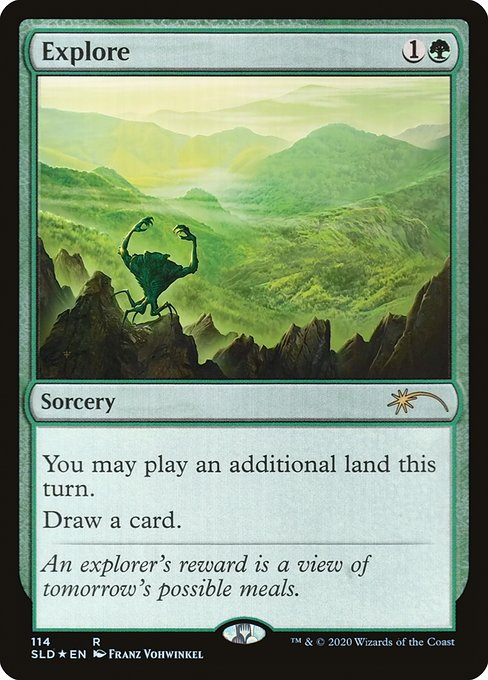

In [ ]:
display(Image(data=sorcery.content))

## Card Frame
Let's print out what kind of layout, so we can see visually how is a specific layout

In [ ]:
unique_layout = df['layout'].unique()
print(unique_layout)

['normal' 'saga' 'meld' 'prototype' 'transform' 'split' 'adventure'
 'modal_dfc' 'leveler' 'flip' 'class']


### Normal Frame
In this case see any cards above (except for battles).

### Sagas
Saga is an enchantment type introduced in *Dominaria*. Each Saga tells the story of a key event from the past as it unfolds during each of your turns.Each separate step in the story is called a chapter, and is marked by a roman numeral (I, II, III, etc.). Saga cards are historic.

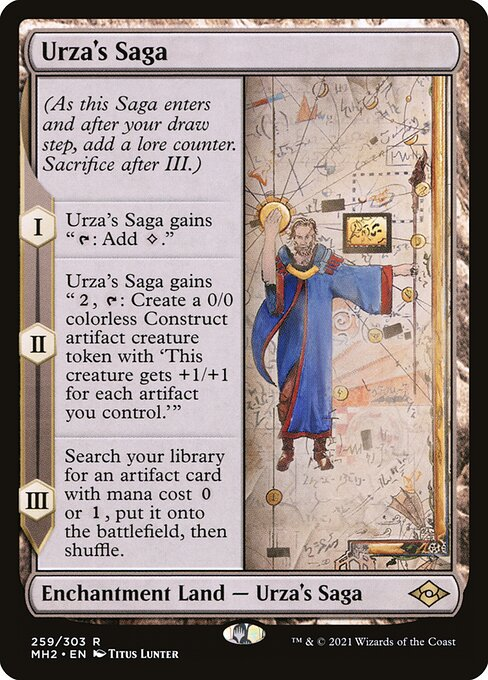

In [ ]:
saga = requests.get(f"{url_images}?fuzzy=urza+saga&format=image&version=normal")
display(Image(data=saga.content))

### Meld
Meld is a keyword action that means to turn two meld cards on the back side into one oversized card, if you control the proper pair. It was introduced in *Eldritch Moon* with three pairs. Meld returned with three more meld pairs in *The Brothers' War*.

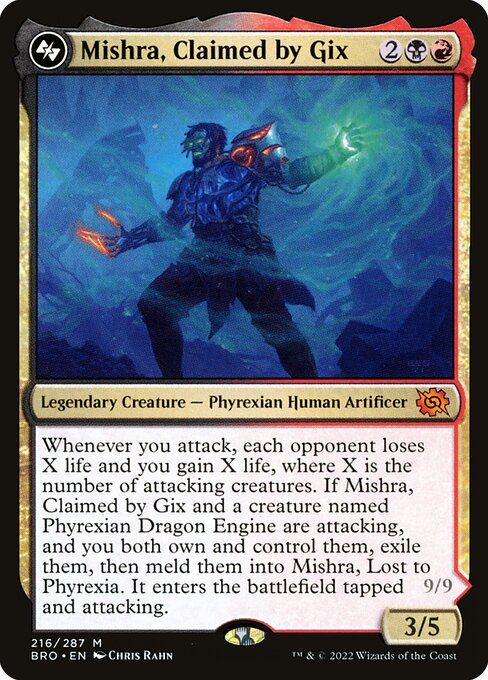

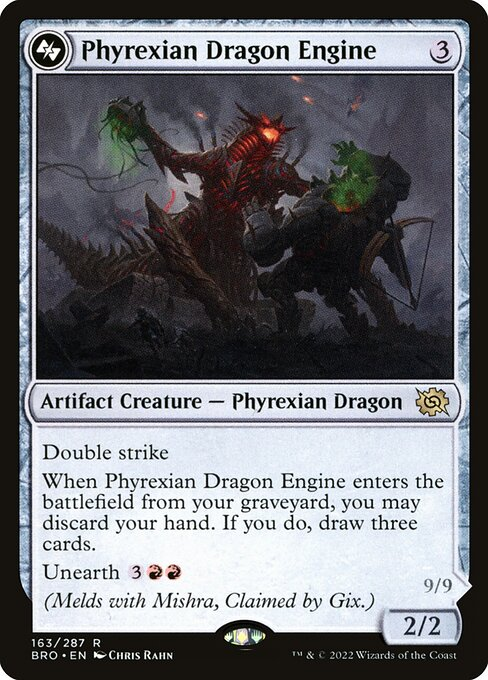

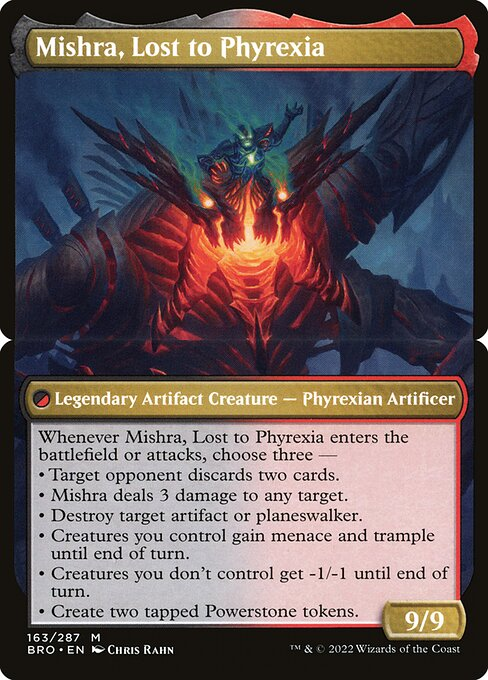

In [ ]:
meld_face_1 = requests.get(f"{url_images}?fuzzy=mishra+claimed&format=image&version=normal")
meld_face_2 = requests.get(f"{url_images}?fuzzy=phyrexian+dragon+engine&format=image&version=normal")
meld_huge = requests.get(f"{url_images}?fuzzy=mishra+lost&format=image&version=normal")
display(Image(data=meld_face_1.content))
display(Image(data=meld_face_2.content))
display(Image(data=meld_huge.content))

### Prototype

Prototype is a keyword ability introduced in *The Brothers' War* which allows an alternate version of a card to be cast for less than its normal mana cost. It is unique to artifacts and artifact creatures. Each prototype card has two sets of characteristics:

    1. Its default mana cost, power, and toughness – printed in their normal positions on the card. The mana cost is entirely colorless and greater than 4.
    2. A secondary set of color, mana cost, power and toughness printed in the prototype ability.

In [ ]:
prototype = requests.get(f"{url_images}?fuzzy=arcane+proxy&format=image&version=normal")
df[df['name']=='Arcane Proxy'][columns_to_display]


name     layout mana_cost                   type_line  \
14340  Arcane Proxy  prototype       {7}  Artifact Creature — Wizard   

                                             oracle_text power toughness  \
14340  Prototype {1}{U}{U} — 2/1 (You may cast this s...     4         3   

      loyalty  
14340     NaN

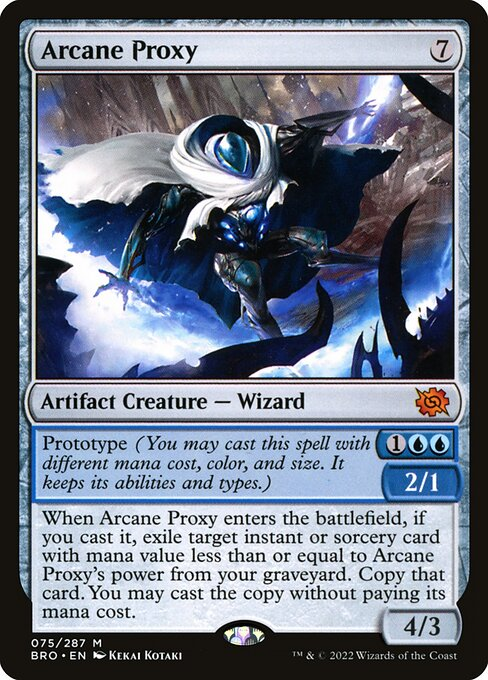

In [ ]:
display(Image(data=prototype.content))

### Split Card
Split cards are Magic cards with two card faces on the front side. A split card is literally "split" into two separate cards each with its card name, art, mana cost, text, etc. Split cards can only be instants and sorceries, not permanents.


Regular split cards are named with a ”__________ and __________“ convention while Aftermath cards use a ”__________ to __________“ convention. In *Guilds of Ravnica*, the card halves have alliterative names, starting with the same three letters.

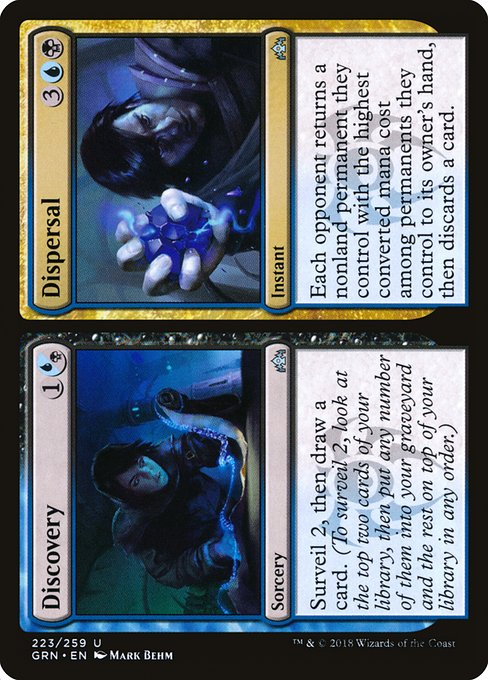

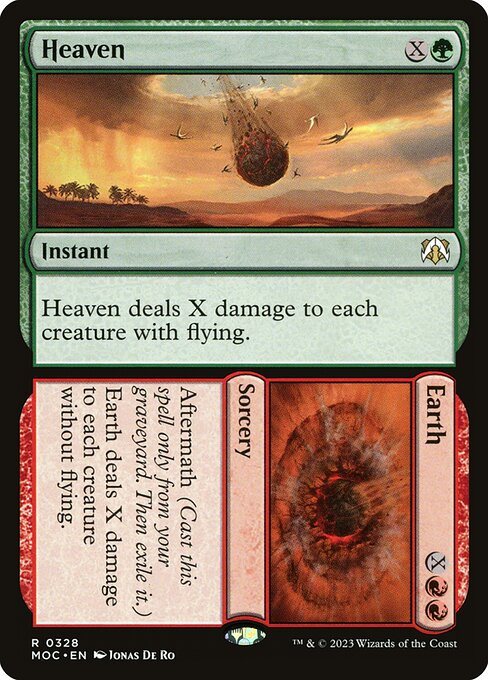

In [ ]:
split1 = requests.get(f"{url_images}?fuzzy=discovery+dispersal&format=image&version=normal")
split2 = requests.get(f"{url_images}?fuzzy=heaven+earth&format=image&version=normal")
display(Image(data=split1.content))
display(Image(data=split2.content))

### Adventures
Adventure is a spell type, a subtype seen on instants and sorceries attached to permanent cards, primarily appearing on creatures. It was introduced in *Throne of Eldraine*. Permanents with Adventures are called adventurer cards in the rules, and are referred to as cards that "have an Adventure" when this attribute is significant to other cards.

Initially, Adventures only appeared on creature cards, though the rules did not specify any type restrictions. As such, they could, and eventually did, appear on other permanent types. They currently appear on artifacts and enchantments in addition to creatures.

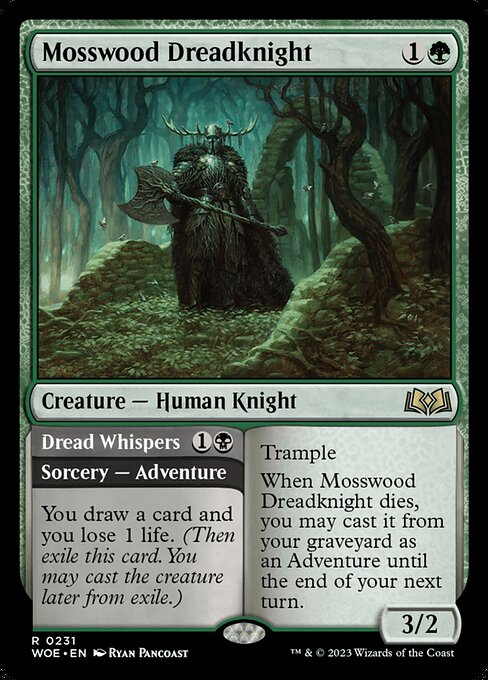

In [ ]:
adventure = requests.get(f"{url_images}?fuzzy=mosswood&format=image&version=normal&set")
display(Image(data=adventure.content))

### Flip Cards
Flip cards are two cards in one. When something is triggered, the card is flipped and becomes the "other" part of the card. These types of cards, like *Transform* and *Modal Daouble faced* cards, have a specific structure in the column *card_faces*

#### *Rulings*
You ignore the information on the bottom half of the card until the creature in play "flips" when certain heroic conditions are met. When you flip a hero, you turn it upside down and play with the other half of the card. All of the flipped versions are legendary and have powerful abilities.

In [ ]:
flip_face_front = requests.get(f"{url_images}?fuzzy=akki+lavarunner&format=image&version=normal")

flip_face = pd.concat([pd.DataFrame(x) for x in df[df['name'].str.contains('Akki Lavarunner', case=False, na=False)]['card_faces']],
    ignore_index=True)

flip_face = flip_face.drop(["object","artist", 'artist_id', 'illustration_id', 'flavor_name'], axis=1 )
flip_face

name mana_cost                           type_line  \
0        Akki Lavarunner    {3}{R}           Creature — Goblin Warrior   
1  Tok-Tok, Volcano Born            Legendary Creature — Goblin Shaman   

                                         oracle_text power toughness  
0  Haste\nWhenever Akki Lavarunner deals damage t...     1         1  
1  Protection from red\nIf a red source would dea...     2         2

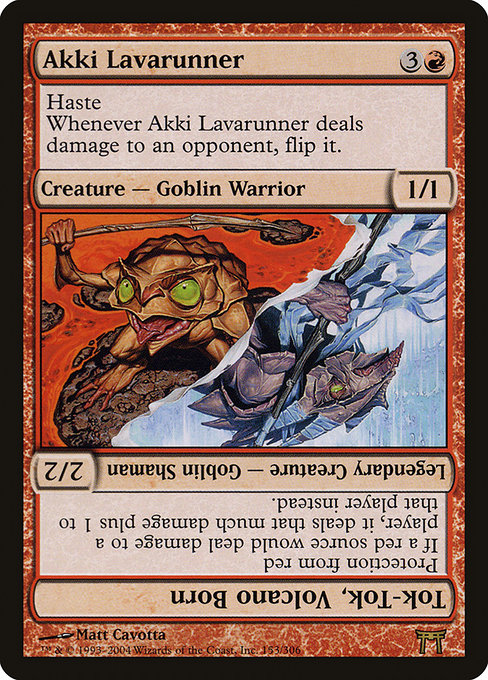

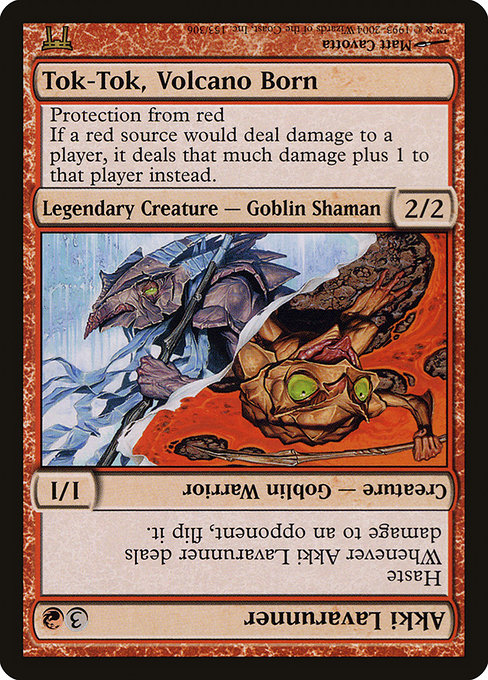

In [ ]:
from PIL import Image as AcquireImage
from io import BytesIO
display(Image(data=flip_face_front.content))
rotated = AcquireImage.open(BytesIO(flip_face_front.content)).rotate(180)
rotated.show()
display(rotated)

### Double Faced card
Double-faced cards (DFCs) in Magic have a regular card frame on each side, and no card back. Each face has a symbol to denote the front from the back. Traditional DFCs can be transformed or converted from their front face to their back face while modal DFCs can be played as either face but cannot transform or convert.
They can be litteraly any kind of cards.
<br>
More information about the most iconic layout at the section [712](https://media.wizards.com/2023/downloads/MagicCompRules%2020231013.pdf#%5B%7B%22num%22%3A5%2C%22gen%22%3A0%7D%2C%7B%22name%22%3A%22XYZ%22%7D%2C88%2C605%2C0%5D) of the Comprehensive Rules.

In [ ]:
tranform_face_front = requests.get(f"{url_images}?fuzzy=teachings+kirin&format=image&version=normal")
tranform_face_back = requests.get(f"{url_images}?fuzzy=kirin-touched&format=image&version=normal&face=back")
tranform_face = pd.concat([pd.DataFrame(x) for x in df[df['name'].str.contains('Kirin-Touched Orochi', case=False, na=False)]['card_faces']],
    ignore_index=True)

tranform_face = tranform_face.drop(["object","artist", 'artist_id', 'illustration_id', 'image_uris', 'flavor_name', 'color_indicator'], axis=1 )
tranform_face

name mana_cost                          type_line  \
0  Teachings of the Kirin    {1}{G}                 Enchantment — Saga   
1    Kirin-Touched Orochi            Enchantment Creature — Snake Monk   

                                         oracle_text colors power toughness  
0  (As this Saga enters and after your draw step,...    [G]   NaN       NaN  
1  Whenever Kirin-Touched Orochi attacks, choose ...    [G]     1         1

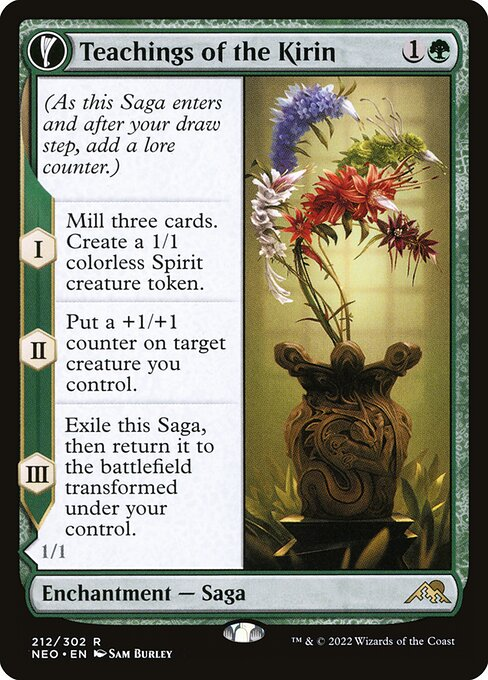

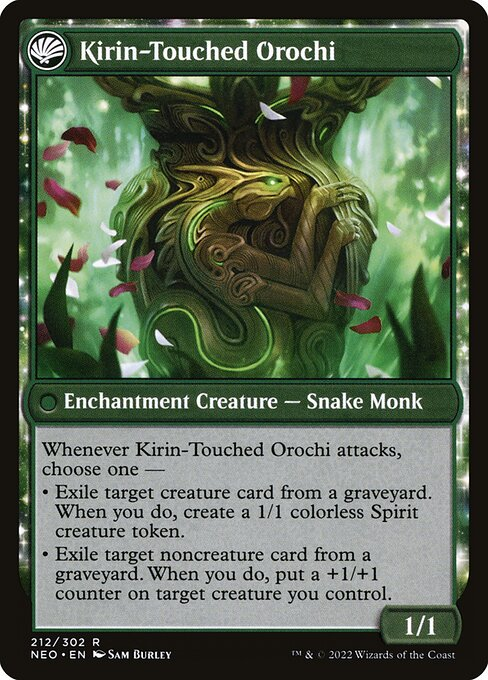

In [ ]:
display(Image(data=tranform_face_front.content))
display(Image(data=tranform_face_back.content))


### Modal double-faced cards

Like previously released double-faced cards, modal double-faced cards have two card faces, one on each side of the card. But these cards don't transform.When you play a modal double-faced card, you choose which face you're playing.

Modal double-faced cards fit in the same design space as split cards, but the latter can only be instants and sorceries. This means MDFCs tend to have at least one side be permanent. Technically, there could be an MDFC with two instants and/or sorceries with text that couldn’t fit on a split card.


In [ ]:
modal_face_front = requests.get(f"{url_images}?fuzzy=jorn+winter&format=image&version=normal")
modal_face_back = requests.get(f"{url_images}?fuzzy=jorn+winter&format=image&version=normal&face=back")
modal_face = pd.concat([pd.DataFrame(x) for x in df[df['name'].str.contains('Jorn, God of Winter', case=False, na=False)]['card_faces']],
    ignore_index=True)

modal_face = modal_face.drop(["object","artist", 'artist_id', 'illustration_id', 'image_uris', 'flavor_name'], axis=1 )
modal_face

name  mana_cost                      type_line  \
0      Jorn, God of Winter     {2}{G}  Legendary Snow Creature — God   
1  Kaldring, the Rimestaff  {1}{U}{B}        Legendary Snow Artifact   

                                         oracle_text  colors power toughness  \
0  Whenever Jorn attacks, untap each snow permane...     [G]     3         3   
1  {T}: You may play target snow permanent card f...  [B, U]   NaN       NaN   

                                         flavor_text  
0                  "Wherever snow falls, I am home."  
1  As the sagas tell it, Jorn collects a sliver o...

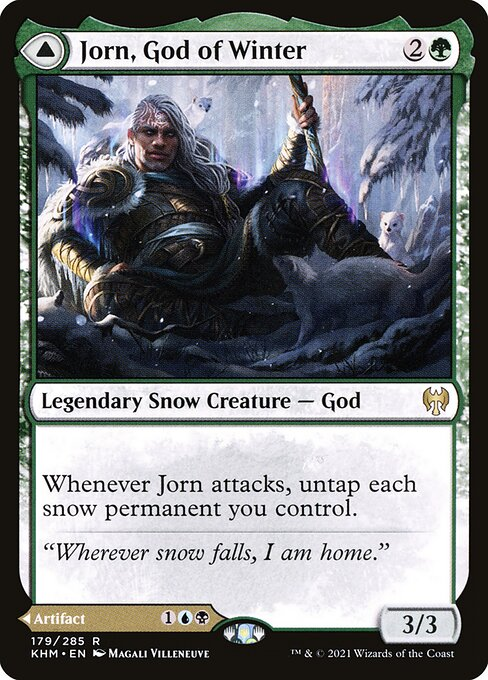

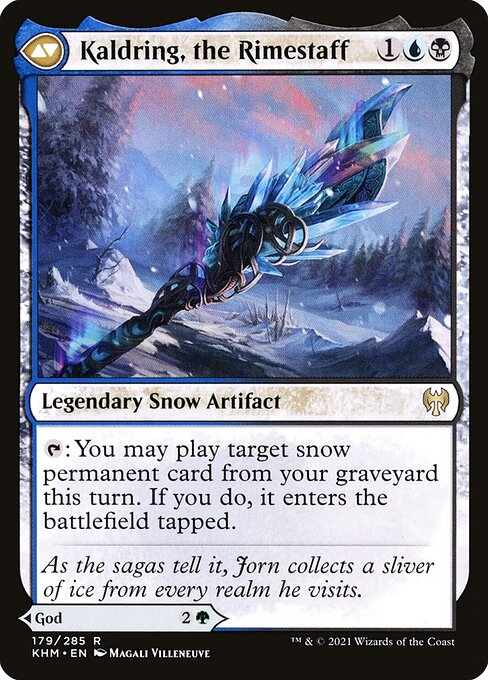

In [ ]:
display(Image(data=modal_face_front.content))
display(Image(data=modal_face_back.content))

### Leveler Card
Leveler cards feature striated text boxes, three power/toughness boxes and use the level up keyword. They are usually referred to as Levelers.

In [ ]:
leveler = requests.get(f"{url_images}?fuzzy=hexderinker&format=image&version=normal&set")
pd.options.display.max_colwidth = 1000
df[df['name']=='Hexdrinker'][columns_to_display]

name   layout mana_cost         type_line  \
12499  Hexdrinker  leveler       {G}  Creature — Snake   

                                                                                                                                                             oracle_text  \
12499  Level up {1} ({1}: Put a level counter on this. Level up only as a sorcery.)\nLEVEL 3-7\n4/4\nProtection from instants\nLEVEL 8+\n6/6\nProtection from everything   

      power toughness loyalty  
12499     2         1     NaN

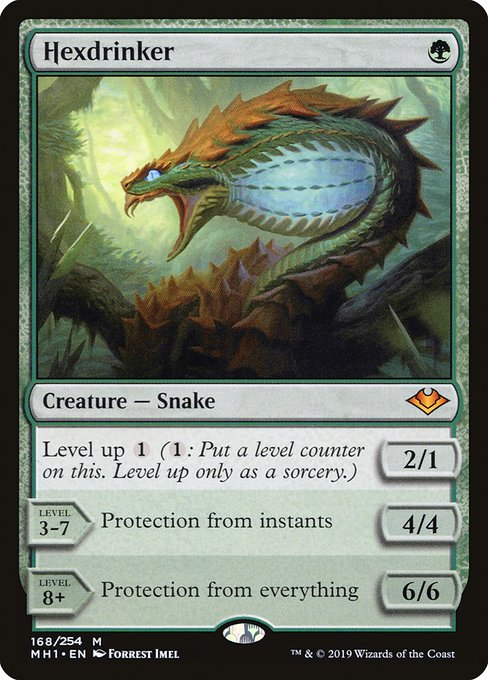

In [ ]:
display(Image(data=leveler.content))

### Class Card
Classes act as they would during a game of D&D. They are similar to the Level up mechanic, and have effects that stack as you level up.

Each Class has three abilities in sections of its text box, called Class abilities. The abilities are arranged vertically like Sagas and have vertical artwork of the D&D symbol of the creature class in its art. The first Class ability is active as long as you control the Class. The next two are activated abilities that allow it to level up. Class abilities are activated at sorcery speed, meaning during your main phase if the stack is empty. As mana is paid for the second ability, the Class will become level 2 and the first two class abilities are active. If a Class is level 2, you can activate the level 3 ability. Note that you can only activate a Class's level 3 ability if the Class is level 2.

Class abilities can be anything — static abilities, activated abilities, or triggered abilities.

A Class's level isn't tracked with or represented by counters. A Class's level is just something true about the permanent.

In [ ]:
class_card = requests.get(f"{url_images}?fuzzy=rogue+class&format=image&version=normal&set")
df[df['name']=='Rogue Class'][columns_to_display]

name layout mana_cost            type_line  \
14049  Rogue Class  class    {U}{B}  Enchantment — Class   

                                                                                                                                                                                                                                                                                                                                                                                                                                          oracle_text  \
14049  (Gain the next level as a sorcery to add its ability.)\nWhenever a creature you control deals combat damage to a player, exile the top card of that player's library face down. You may look at it for as long as it remains exiled.\n{1}{U}{B}: Level 2\nCreatures you control have menace.\n{2}{U}{B}: Level 3\nYou may play cards exiled with Rogue Class, and you may spend mana as though it were mana of any color to cast those spells.   

      power toughness loyalty  
14049   NaN       NaN     NaN

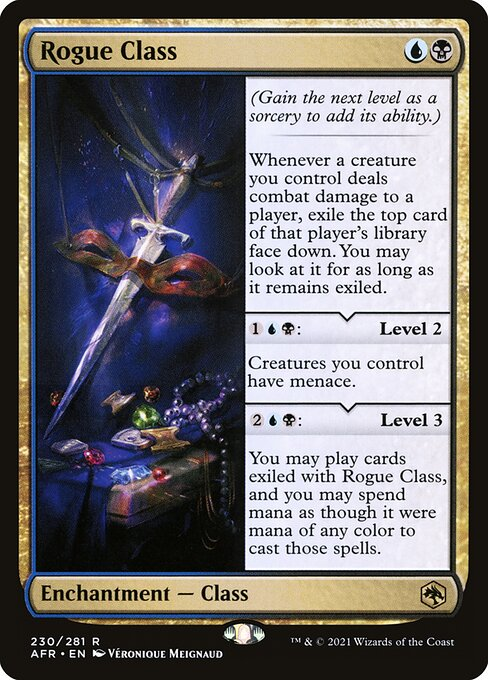

In [ ]:
display(Image(data=class_card.content))

## Stats and Info


In [ ]:
df.info()

#### Permanents

In [ ]:
permanent_cards = df[df.apply(is_permanent_card, axis=1)]
permanent_cards.info()

In [ ]:
permanent_cards.isna().sum()

#### Nonpermanent

In [ ]:
nonpermanent_cards = df[df.apply(is_nonpermanent_card, axis=1)]
nonpermanent_cards.info()

In [ ]:
nonpermanent_cards.isna().sum()

#### Vanilla Creatures
Vanilla creatures are basically cards not really interesting to analyze in case, the `oracle_text` is empty

In [ ]:
vanilla_cards = df[df.apply(is_vanilla, axis=1)]
vanilla_cards.info()

#### Double faced cards

In [ ]:
double_faced_cards = df[df.apply(is_double_faced, axis=1)]
double_faced_cards.info()

In [ ]:
double_faced_cards.isna().sum()

#### Meld Cards

In [ ]:
meld_cards = df[df.apply(is_meld, axis=1)]
meld_cards.info()

In [ ]:
meld_cards.isna().sum()

#### Flip Cards
As analyzed here, flip cards works as the same as transform cards inside the dataframe, so we could classify all of them as `multi_face_cards`.

In [ ]:
flip_cards = df[df.apply(is_flip, axis=1)]
flip_cards.info()

In [ ]:
flip_cards.isna().sum()

#### Split Cards
As analyzed here, split cards works as the same as transform cards inside the dataframe, so we could classify all of them as `multi_face_cards`.

In [ ]:
split_cards = df[df.apply(is_split, axis=1)]
split_cards.info()

In [ ]:
split_cards.isna().sum()

#### Adventure cards
As analyzed here, adventure cards works as the same as transform cards inside the dataframe, so we could classify all of them as `multi_face_cards`.

In [ ]:
adventure_cards = df[df.apply(is_adventure, axis=1)]
adventure_cards.info()

In [ ]:
adventure_cards.isna().sum()

#### Sagas
An interesting stats seems that saga's are referred to only cards that are not double faced like in the *Kamigawa Neon Dynasty*'s expansion

In [ ]:
saga_cards = df[df.apply(is_saga, axis=1)]
saga_cards.info()

In [ ]:
saga_cards.isna().sum()

#### Levelers

In [ ]:
leveler_cards = df[df.apply(is_leveler, axis=1)]
leveler_cards.info()

In [ ]:
leveler_cards.isna().sum()

#### class

In [ ]:
class_cards = df[df.apply(is_class, axis=1)]
class_cards.info()

In [ ]:
class_cards.isna().sum()

#### Prototype

In [ ]:
prototype_cards = df[df.apply(is_prototype, axis=1)]
prototype_cards.info()

In [ ]:
prototype_cards.isna().sum()

#### planeswalker
For this specific case, cards with `oracle_text` and `mana_cost` which are NaN are from `multi_face_cards`

In [ ]:
planeswalker_cards = df[df.apply(is_planeswalker_card, axis=1)]
planeswalker_cards.info()

In [ ]:
planeswalker_cards.isna().sum()

In [ ]:
print("Number of Unique elements in the DataFrame:", df['name'].value_counts)

In [ ]:
df.isna().sum()

## Data Preparation

In [ ]:
import nltk
import re

Let's start by identifying all cards' names

In [ ]:
name_connector = ' // '
df['name_length'] = df['name'].apply(len)
card_names = df.sort_values(by='name_length', ascending=False)[['name', 'name_length']]
card_names = card_names[~df['name'].str.contains(name_connector)]
card_names

<ipython-input-41-324874edb906>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  card_names = card_names[~df['name'].str.contains(name_connector)]


name  name_length
6917   Okina, Temple to the Grandfathers           33
12492    The Tabernacle at Pendrell Vale           31
6347     Narrow-Minded Baloney Fireworks           31
14386    Liberator, Urza's Battlethopter           31
3764     Asmoranomardicadaistinaculdacar           31
...                                  ...          ...
10144                                Zap            3
16249                                Hex            3
13358                                Opt            3
9861                                 Pox            3
29462                                Tek            3

[25445 rows x 2 columns]

In [ ]:
card_with_multiple_names = df.sort_values(by='name_length', ascending=False)[['name', 'name_length']]
card_with_multiple_names = card_with_multiple_names[df['name'].str.contains(name_connector)]
card_with_multiple_names = card_with_multiple_names[card_with_multiple_names['name_length'] > 23]
card_with_multiple_names

<ipython-input-42-263cfc8378b9>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  card_with_multiple_names = card_with_multiple_names[df['name'].str.contains(name_connector)]


name  \
12882  Hermit of the Natterknolls // Lone Wolf of the Natterknolls   
18223  Blitzwing, Cruel Tormentor // Blitzwing, Adaptive Assailant   
6268    Reidane, God of the Worthy // Valkmira, Protector's Shield   
21924    Liliana, Heretical Healer // Liliana, Defiant Necromancer   
11735    Uvilda, Dean of Perfection // Nassari, Dean of Expression   
...                                                            ...   
2253                                     Integrity // Intervention   
27736                                    Hired Muscle // Scarmaker   
6331                                     Incubation // Incongruity   
22808                                     Fae of Wishes // Granted   
11990                                     Hezrou // Demonic Stench   

       name_length  
12882           59  
18223           59  
6268            58  
21924           57  
11735           57  
...            ...  
2253            25  
27736           25  
6331            25  
22808           24  
11990           24  

[542 rows x 2 columns]

In [ ]:
splitted_names_df = pd.DataFrame(columns=['name', 'name_length'])
dfs_to_concat = []

for index, row in card_with_multiple_names.iterrows():
    splitted_names = row['name'].split(name_connector)
    df_to_append = pd.DataFrame({'name': splitted_names, 'name_length': [len(name) for name in splitted_names]})
    dfs_to_concat.append(df_to_append)

splitted_names_df = pd.concat(dfs_to_concat, ignore_index=True)
splitted_names_df.reset_index(drop=True, inplace=True)
splitted_names_df

name  name_length
0        Hermit of the Natterknolls           26
1     Lone Wolf of the Natterknolls           29
2        Blitzwing, Cruel Tormentor           26
3     Blitzwing, Adaptive Assailant           29
4        Reidane, God of the Worthy           26
...                             ...          ...
1079                    Incongruity           11
1080                  Fae of Wishes           13
1081                        Granted            7
1082                         Hezrou            6
1083                 Demonic Stench           14

[1084 rows x 2 columns]

In [ ]:
card_names = pd.concat([card_names, splitted_names_df])
card_names = card_names.sort_values(by='name_length', ascending=False)
card_names

name  name_length
6917   Okina, Temple to the Grandfathers           33
13     Aetherwing, Golden-Scale Flagship           33
20109    Sunhome, Fortress of the Legion           31
12492    The Tabernacle at Pendrell Vale           31
29596    Itzquinth, Firstborn of Gishath           31
...                                  ...          ...
29446                                Okk            3
30157                                Nix            3
9787                                 Mob            3
30083                                Vex            3
25864                                Fly            3

[26529 rows x 2 columns]

Now we go with the identification of the symbols of the cards

In [ ]:
#https://api.scryfall.com/symbology
symbols_request = requests.get('https://api.scryfall.com/symbology')
symbols = pd.DataFrame(symbols_request.json().get('data'))
symbols = symbols[symbols['funny'] == False]
symbols = symbols[['symbol', 'english']]
symbols


symbol               english
0       {T}    tap this permanent
1       {Q}  untap this permanent
2       {E}     an energy counter
3      {PW}          planeswalker
4   {CHAOS}                 chaos
..      ...                   ...
70      {B}        one black mana
71      {R}          one red mana
72      {G}        one green mana
73      {C}    one colorless mana
74      {S}         one snow mana

[66 rows x 2 columns]

Now I'll take all `oracle_text` from the cards and put in a variable called `raw_oracle_text`.

In [ ]:
raw_oracle_text = df[~df['oracle_text'].isna()].sort_values(by='name_length', ascending=False)
raw_oracle_text = raw_oracle_text[['oracle_text','name_length', 'name']]
raw_oracle_text

oracle_text  \
6917                                                                                                                                                                                                                                                          {T}: Add {G}.\n{G}, {T}: Target legendary creature gets +1/+1 until end of turn.   
20109                                                                                                                                                                                                                                                    {T}: Add {C}.\n{2}{R}{W}, {T}: Target creature gains double strike until end of turn.   
3764   As long as you've discarded a card this turn, you may pay {B/R} to cast this spell.\nWhen Asmoranomardicadaistinaculdacar enters the battlefield, you may search your library for a card named The Underworld Cookbook, reveal it, put it into your hand, then shuffle.\nSacrifice two Foods: Target creature deals 6 damage to itself.   
29596                                                                                                                                                Haste\nWhen Itzquinth, Firstborn of Gishath enters the battlefield, you may pay {2}. When you do, target Dinosaur you control deals damage equal to its power to another target creature.   
5065                                                                                        Whenever you attack, target attacking Vampire that isn't a Demon becomes a Demon in addition to its other types. It gains "When this creature dies, draw a card and create a tapped 4/3 white and black Vampire Demon creature token with flying."   
...                                                                                                                                                                                                                                                                                                                                        ...   
10144                                                                                                                                                                                                                                                                                          Zap deals 1 damage to any target.\nDraw a card.   
16249                                                                                                                                                                                                                                                                                                            Destroy six target creatures.   
6869                                                                                                                                                                                                                               This spell can't be countered.\nFry deals 5 damage to target creature or planeswalker that's white or blue.   
10674                                                                                                                                   Enchant creature (Target a creature as you cast this. This card enters the battlefield attached to that creature.)\nEnchanted creature gets +0/+2 and has reach. (It can block creatures with flying.)   
13358                                                                                                                                                                                                                                                                                                                    Scry 1.\nDraw a card.   

       name_length                               name  
6917            33  Okina, Temple to the Grandfathers  
20109           31    Sunhome, Fortress of the Legion  
3764            31    Asmoranomardicadaistinaculdacar  
29596           31    Itzquinth, Firstborn

From now on we'll use some top 1K cards in order to the data due to its time constraint algorithm I need to solve.

In [ ]:
NUMBER_OF_SAMPLES = 1000
RANDOM_SEED = 12

#raw_text_sample = raw_oracle_text.sample(n=NUMBER_OF_SAMPLES, random_state=RANDOM_SEED)
#card_names_sample = card_names.sample(n=NUMBER_OF_SAMPLES, random_state=RANDOM_SEED)

#raw_text_sample = raw_oracle_text.head(NUMBER_OF_SAMPLES)
#card_names_sample = card_names.head(NUMBER_OF_SAMPLES)



raw_text_sample = raw_oracle_text.sort_values('name_length', ascending=False)
card_names_sample = card_names.sort_values('name_length', ascending=False)

In [ ]:
raw_text_sample

oracle_text  \
6917                                                                                                                                                                                                                                                                             {T}: Add {G}.\n{G}, {T}: Target legendary creature gets +1/+1 until end of turn.   
5383                                                                                                                                                                                                                                                {2}: The next time an artifact source of your choice would deal damage to you this turn, prevent that damage.   
20109                                                                                                                                                                                                                                                                       {T}: Add {C}.\n{2}{R}{W}, {T}: Target creature gains double strike until end of turn.   
7757                                                                                                                                                                  {2}{G}, {T}: Create a 1/1 colorless Servo artifact creature token.\n{4}{G}, {T}: Create an X/X colorless Construct artifact creature token, where X is the number of creatures you control.   
1792   {T}, Exile a creature card from your graveyard: Discover X, where X is the mana value of the exiled card. Activate only as a sorcery. (Exile cards from the top of your library until you exile a nonland card with that mana value or less. Cast it without paying its mana cost or put it into your hand. Put the rest on the bottom in a random order.)   
...                                                                                                                                                                                                                                                                                                                                                           ...   
9787                                                                                                                                                                               Convoke (Your creatures can help cast this spell. Each creature you tap while casting this spell pays for {1} or one mana of that creature's color.)\nDestroy target creature.   
25864                                                                                                                                                                 Enchant creature\nEnchanted creature has flying and "Whenever this creature deals combat damage to a player, venture into the dungeon." (Enter the first room or advance to the next room.)   
29446                                                                                                                                                                                                                      Okk can't attack unless a creature with greater power also attacks.\nOkk can't block unless a creature with greater power also blocks.   
30157                                                                                                                                                                                                                                                                                                       Counter target spell if no mana was spent to cast it.   
13358                                                                                                                                                                                                                                                                                                                                       Scry 1.\nDraw a card.   

       name_length                               name  
6

Now we need to add the oracle text of all multi faced cards.

In [ ]:
multi_faced_cards = df[df.apply(is_multi_faced, axis=1)].sort_values(by='name_length', ascending=False)[['card_faces', 'name_length', 'name']]
print(multi_faced_cards)
face_oracle_text = []
for index, row in multi_faced_cards.iterrows():
    card_faces = row['card_faces']
    name_length = row['name_length']
    card_name = row['name']
    for face in card_faces:
        oracle_text = face['oracle_text']
        face_oracle_text.append((oracle_text, name_length, card_name))

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    card

Time to append all the `face_oracle_text` into `raw_oracle_text`

In [ ]:
raw_oracle_text = pd.concat([raw_oracle_text, pd.DataFrame(face_oracle_text, columns=['oracle_text', 'name_length', 'name'])])
raw_oracle_text = raw_oracle_text.sort_values(by='name_length', ascending=False)
raw_oracle_text

oracle_text  \
0                                                       More Than Meets the Eye {3}{B} (You may cast this card converted for {3}{B}.)\nAt the beginning of your end step, target opponent loses life equal to the life that player lost this turn. If no life is lost this way, convert Blitzwing.   
2                                                                                                                      Whenever an opponent casts a spell during your turn, draw a card.\nAt the beginning of each upkeep, if no spells were cast last turn, transform Hermit of the Natterknolls.   
3                                                                                                   Whenever an opponent casts a spell during your turn, draw two cards.\nAt the beginning of each upkeep, if a player cast two or more spells last turn, transform Lone Wolf of the Natterknolls.   
1                 Living metal (As long as it's your turn, this Vehicle is also a creature.)\nAt the beginning of combat on your turn, choose flying or indestructible at random. Blitzwing gains that ability until end of turn.\nWhenever Blitzwing deals combat damage to a player, convert it.   
5      If a source an opponent controls would deal damage to you or a permanent you control, prevent 1 of that damage.\nWhenever you or another permanent you control becomes the target of a spell or ability an opponent controls, counter that spell or ability unless its controller pays {1}.   
...                                                                                                                                                                                                                                                                                            ...   
16249                                                                                                                                                                                                                                                                Destroy six target creatures.   
6869                                                                                                                                                                                   This spell can't be countered.\nFry deals 5 damage to target creature or planeswalker that's white or blue.   
10674                                                                                       Enchant creature (Target a creature as you cast this. This card enters the battlefield attached to that creature.)\nEnchanted creature gets +0/+2 and has reach. (It can block creatures with flying.)   
13358                                                                                                                                                                                                                                                                        Scry 1.\nDraw a card.   
26964                                                                                                           Enchant creature\nEnchanted creature gets +2/+2, has first strike, and is a Knight in addition to its other types. (It deals combat damage before creatures without first strike.)   

       name_length  \
0               59   
2               59   
3               59   
1               59   
5               58   
...            ...   
16249            3   
6869             3   
10674            3   
13358            3   
26964            3   

                                                              name  
0      Blitzwing, Cruel Tormentor // Blitzwing, Adaptive Assailant  
2      Hermit of the Natterknolls // Lone Wolf of the Natterknolls  
3      Hermit of the Natterknolls // Lone Wolf of the Natterknolls  
1      Blitzwing, Cruel Tormentor // Blitzwing, Adaptive Assailant  
5       Reidane, God of the Worthy // Valkmira, Protector's Shield  
...                                                            ...  
16

In [ ]:
card_names_sample

In [ ]:
# https://api.scryfall.com/catalog/ability-words
# https://api.scryfall.com/catalog/keyword-actions
# https://api.scryfall.com/catalog/keyword-abilities
ability_words = pd.DataFrame(requests.get('https://api.scryfall.com/catalog/ability-words').json().get('data'))
keyword_actions = pd.DataFrame(requests.get('https://api.scryfall.com/catalog/keyword-actions').json().get('data'))
keyword_abilities  = pd.DataFrame(requests.get('https://api.scryfall.com/catalog/keyword-abilities').json().get('data'))

In [ ]:
ability_words

0
0             Battalion
1             Bloodrush
2               Channel
3                Chroma
4                Cohort
5         Constellation
6              Converge
7              Delirium
8                Domain
9          Fateful hour
10            Ferocious
11           Formidable
12             Grandeur
13             Hellbent
14               Heroic
15              Imprint
16             Inspired
17          Join forces
18              Kinship
19             Landfall
20           Lieutenant
21           Metalcraft
22               Morbid
23               Parley
24             Radiance
25                 Raid
26                Rally
27        Spell mastery
28               Strive
29                Sweep
30       Tempting offer
31            Threshold
32  Will of the council
33              Adamant
34             Addendum
35    Council's dilemma
36             Eminence
37               Enrage
38        Hero's Reward
39              Kinfall
40             Landship
41               Legacy
42               Revolt
43             Underdog
44          Undergrowth
45              Descend
46   Fathomless descent
47            Magecraft
48             Teamwork
49         Pack tactics
50                Coven
51             Alliance
52            Corrupted
53       Secret council
54          Celebration
55              Paradox

In [ ]:
keyword_actions

0
0                             Seek
1                         Activate
2                           Attach
3                             Cast
4                          Counter
5                           Create
6                          Destroy
7                          Discard
8                           Double
9                         Exchange
10                           Exile
11                           Adapt
12                         Support
13                            Play
14                      Regenerate
15                          Reveal
16                       Sacrifice
17                         Shuffle
18                             Tap
19                           Untap
20                            Vote
21                            Goad
22                       Transform
23                         Surveil
24                      Planeswalk
25                            Mill
26                           Learn
27                         Connive
28        Venture into the dungeon
29                           Exert
30              Open an Attraction
31                            Food
32                        Discover
33                         Conjure
34                         Abandon
35                         Explore
36                           Amass
37                        Treasure
38  Roll to Visit Your Attractions
39                   Set in motion
40                        Fateseal
41                        Manifest
42                        Populate
43                          Detain
44                     Investigate
45                     Monstrosity
46                           Clash
47                            Scry
48                        Incubate
49                     Proliferate
50                            Meld
51                         Convert
52                           Fight
53                         Bolster
54                        Assemble
55                      Role token

In [ ]:
keyword_abilities

0
0          Living weapon
1             Jump-start
2     Commander ninjutsu
3     Legendary landwalk
4      Nonbasic landwalk
..                   ...
190          Landcycling
191              Bargain
192  Choose a background
193                 Echo
194   Doctor's companion

[195 rows x 1 columns]

In [ ]:
raw_oracle_text

oracle_text  \
0                                                       More Than Meets the Eye {3}{B} (You may cast this card converted for {3}{B}.)\nAt the beginning of your end step, target opponent loses life equal to the life that player lost this turn. If no life is lost this way, convert Blitzwing.   
2                                                                                                                      Whenever an opponent casts a spell during your turn, draw a card.\nAt the beginning of each upkeep, if no spells were cast last turn, transform Hermit of the Natterknolls.   
3                                                                                                   Whenever an opponent casts a spell during your turn, draw two cards.\nAt the beginning of each upkeep, if a player cast two or more spells last turn, transform Lone Wolf of the Natterknolls.   
1                 Living metal (As long as it's your turn, this Vehicle is also a creature.)\nAt the beginning of combat on your turn, choose flying or indestructible at random. Blitzwing gains that ability until end of turn.\nWhenever Blitzwing deals combat damage to a player, convert it.   
5      If a source an opponent controls would deal damage to you or a permanent you control, prevent 1 of that damage.\nWhenever you or another permanent you control becomes the target of a spell or ability an opponent controls, counter that spell or ability unless its controller pays {1}.   
...                                                                                                                                                                                                                                                                                            ...   
16249                                                                                                                                                                                                                                                                Destroy six target creatures.   
6869                                                                                                                                                                                   This spell can't be countered.\nFry deals 5 damage to target creature or planeswalker that's white or blue.   
10674                                                                                       Enchant creature (Target a creature as you cast this. This card enters the battlefield attached to that creature.)\nEnchanted creature gets +0/+2 and has reach. (It can block creatures with flying.)   
13358                                                                                                                                                                                                                                                                        Scry 1.\nDraw a card.   
26964                                                                                                           Enchant creature\nEnchanted creature gets +2/+2, has first strike, and is a Knight in addition to its other types. (It deals combat damage before creatures without first strike.)   

       name_length  \
0               59   
2               59   
3               59   
1               59   
5               58   
...            ...   
16249            3   
6869             3   
10674            3   
13358            3   
26964            3   

                                                              name  
0      Blitzwing, Cruel Tormentor // Blitzwing, Adaptive Assailant  
2      Hermit of the Natterknolls // Lone Wolf of the Natterknolls  
3      Hermit of the Natterknolls // Lone Wolf of the Natterknolls  
1      Blitzwing, Cruel Tormentor // Blitzwing, Adaptive Assailant  
5       Reidane, God of the Worthy // Valkmira, Protector's Shield  
...                                                            ...  
16

In [ ]:
def prepare_mask_ka(word):
    mask = re.sub(r"'s", "", word, flags=re.IGNORECASE)
    mask = mask.replace('-', '_')
    mask = mask.replace(' ', '_')
    mask = mask.upper()
    mask = f"{mask}_KA"
    return mask

def prepare_mask_action(word):
    mask = re.sub(r"'s", "", word, flags=re.IGNORECASE)
    mask = mask.replace('-', '_')
    mask = mask.replace(' ', '_')
    mask = mask.upper()
    mask = f"{mask}_ACT"
    return mask

def prepare_mask_aw(word):
    mask = re.sub(r"'s", "", word, flags=re.IGNORECASE)
    mask = mask.replace(' ', '_')
    mask = mask.upper()
    mask = f"{mask}_AW"
    return mask

In [ ]:
def replace_symbols_with_english(text, symbols):
    for index, symbol in symbols.iterrows():
        text = text.replace(symbol['symbol'], f"{symbol['english']} ")
    return text

def replace_keyword_action(text, keyword_actions):
    for action in keyword_actions:
        mask = prepare_mask_action(action)
        pattern = re.compile(r'\b' + re.escape(action) + r'\b', re.IGNORECASE)
        text = pattern.sub(mask, text)
    return text

def replace_keyword_ability(text, keyword_abilities):
    for keyword in keyword_abilities:
        mask = prepare_mask_ka(keyword)
        pattern = re.compile(r'\b' + re.escape(keyword) + r'\b', re.IGNORECASE)
        text = pattern.sub(mask, text)
    return text

def replace_ability_word(text, ability_words):
    for ability_word in ability_words:
      mask = prepare_mask_aw(ability_word)

      text = text.replace(f"{ability_word} —", mask)
      text = text.replace(f"{ability_word} –", mask)
    return text

def replace_card_names(text, card_names):
    for card_name in card_names['name']:
      if("," in card_name):
        text = text.replace(card_name, 'CARD_NAME')
        text = text.replace(card_name.split(',')[0], 'CARD_NAME')
      else:
        text = text.replace(card_name, 'CARD_NAME')
    return text

def normalise_leveler_text(text):
    if("level up" in text.lower()
       or "gain the next level" in text.lower()):
      text = text.replace('\n', ' % ')
    return text


def normalise_choices(text):
    pattern = re.compile(r"choose\s+(?:ANYTHING)\s+—", re.I)
    if pattern.match(text):
      text = text.replace('•', '- ')
      text = text.replace('\n', '')
    return text

def normalise_roll_d20(text):
    pattern = re.compile(r"roll\s+(?:ANYTHING)\s+d20", re.I)
    if pattern.match(text):
      text = text.replace('\n', '')
    return text

def normalise_colon(text):
    if(":" in text):
      text = text.replace(':', ' ACTIVATED_ABILITY ')
    return text

def normalise_dash(text):
    if("—" in text or "–" in text):
        text = text.replace('—', '')
        text = text.replace('–', '')
    return text

Now let's replace all occurrencies with a token calle `CARD_NAME`


In [ ]:
clean_text_sample = raw_text_sample
clean_text_sample

oracle_text  \
6917                                                                                                                                                                                                                                                                             {T}: Add {G}.\n{G}, {T}: Target legendary creature gets +1/+1 until end of turn.   
5383                                                                                                                                                                                                                                                {2}: The next time an artifact source of your choice would deal damage to you this turn, prevent that damage.   
20109                                                                                                                                                                                                                                                                       {T}: Add {C}.\n{2}{R}{W}, {T}: Target creature gains double strike until end of turn.   
7757                                                                                                                                                                  {2}{G}, {T}: Create a 1/1 colorless Servo artifact creature token.\n{4}{G}, {T}: Create an X/X colorless Construct artifact creature token, where X is the number of creatures you control.   
1792   {T}, Exile a creature card from your graveyard: Discover X, where X is the mana value of the exiled card. Activate only as a sorcery. (Exile cards from the top of your library until you exile a nonland card with that mana value or less. Cast it without paying its mana cost or put it into your hand. Put the rest on the bottom in a random order.)   
...                                                                                                                                                                                                                                                                                                                                                           ...   
9787                                                                                                                                                                               Convoke (Your creatures can help cast this spell. Each creature you tap while casting this spell pays for {1} or one mana of that creature's color.)\nDestroy target creature.   
25864                                                                                                                                                                 Enchant creature\nEnchanted creature has flying and "Whenever this creature deals combat damage to a player, venture into the dungeon." (Enter the first room or advance to the next room.)   
29446                                                                                                                                                                                                                      Okk can't attack unless a creature with greater power also attacks.\nOkk can't block unless a creature with greater power also blocks.   
30157                                                                                                                                                                                                                                                                                                       Counter target spell if no mana was spent to cast it.   
13358                                                                                                                                                                                                                                                                                                                                       Scry 1.\nDraw a card.   

       name_length                               name  
6

In [ ]:
clean_text_sample['oracle_text'] = clean_text_sample['oracle_text'].apply(replace_keyword_ability, keyword_abilities=keyword_abilities[0])
clean_text_sample

oracle_text  \
6917                                                                                                                                                                                                                                                                             {T}: Add {G}.\n{G}, {T}: Target legendary creature gets +1/+1 until end of turn.   
5383                                                                                                                                                                                                                                                {2}: The next time an artifact source of your choice would deal damage to you this turn, prevent that damage.   
20109                                                                                                                                                                                                                                                                    {T}: Add {C}.\n{2}{R}{W}, {T}: Target creature gains DOUBLE_STRIKE_KA until end of turn.   
7757                                                                                                                                                                  {2}{G}, {T}: Create a 1/1 colorless Servo artifact creature token.\n{4}{G}, {T}: Create an X/X colorless Construct artifact creature token, where X is the number of creatures you control.   
1792   {T}, Exile a creature card from your graveyard: Discover X, where X is the mana value of the exiled card. Activate only as a sorcery. (Exile cards from the top of your library until you exile a nonland card with that mana value or less. Cast it without paying its mana cost or put it into your hand. Put the rest on the bottom in a random order.)   
...                                                                                                                                                                                                                                                                                                                                                           ...   
9787                                                                                                                                                                            CONVOKE_KA (Your creatures can help cast this spell. Each creature you tap while casting this spell pays for {1} or one mana of that creature's color.)\nDestroy target creature.   
25864                                                                                                                                                           ENCHANT_KA creature\nEnchanted creature has FLYING_KA and "Whenever this creature deals combat damage to a player, venture into the dungeon." (Enter the first room or advance to the next room.)   
29446                                                                                                                                                                                                                      Okk can't attack unless a creature with greater power also attacks.\nOkk can't block unless a creature with greater power also blocks.   
30157                                                                                                                                                                                                                                                                                                       Counter target spell if no mana was spent to cast it.   
13358                                                                                                                                                                                                                                                                                                                                       Scry 1.\nDraw a card.   

       name_length                               name  
6

In [ ]:
clean_text_sample['oracle_text'] = clean_text_sample['oracle_text'].apply(replace_ability_word, ability_words=ability_words[0])
clean_text_sample

oracle_text  \
6917                                                                                                                                                                                                                                                                             {T}: Add {G}.\n{G}, {T}: Target legendary creature gets +1/+1 until end of turn.   
5383                                                                                                                                                                                                                                                {2}: The next time an artifact source of your choice would deal damage to you this turn, prevent that damage.   
20109                                                                                                                                                                                                                                                                    {T}: Add {C}.\n{2}{R}{W}, {T}: Target creature gains DOUBLE_STRIKE_KA until end of turn.   
7757                                                                                                                                                                  {2}{G}, {T}: Create a 1/1 colorless Servo artifact creature token.\n{4}{G}, {T}: Create an X/X colorless Construct artifact creature token, where X is the number of creatures you control.   
1792   {T}, Exile a creature card from your graveyard: Discover X, where X is the mana value of the exiled card. Activate only as a sorcery. (Exile cards from the top of your library until you exile a nonland card with that mana value or less. Cast it without paying its mana cost or put it into your hand. Put the rest on the bottom in a random order.)   
...                                                                                                                                                                                                                                                                                                                                                           ...   
9787                                                                                                                                                                            CONVOKE_KA (Your creatures can help cast this spell. Each creature you tap while casting this spell pays for {1} or one mana of that creature's color.)\nDestroy target creature.   
25864                                                                                                                                                           ENCHANT_KA creature\nEnchanted creature has FLYING_KA and "Whenever this creature deals combat damage to a player, venture into the dungeon." (Enter the first room or advance to the next room.)   
29446                                                                                                                                                                                                                      Okk can't attack unless a creature with greater power also attacks.\nOkk can't block unless a creature with greater power also blocks.   
30157                                                                                                                                                                                                                                                                                                       Counter target spell if no mana was spent to cast it.   
13358                                                                                                                                                                                                                                                                                                                                       Scry 1.\nDraw a card.   

       name_length                               name  
6

In [ ]:
clean_text_sample['oracle_text'] = clean_text_sample['oracle_text'].apply(replace_card_names, card_names=card_names_sample)
clean_text_sample

oracle_text  \
6917                                                                                                                                                                                                                                                                                     {T}: Add {G}.\n{G}, {T}: Target legendary creature gets +1/+1 until end of turn.   
5383                                                                                                                                                                                                                                                        {2}: The next time an artifact source of your choice would deal damage to you this turn, prevent that damage.   
20109                                                                                                                                                                                                                                                                            {T}: Add {C}.\n{2}{R}{W}, {T}: Target creature gains DOUBLE_STRIKE_KA until end of turn.   
7757                                                                                                                                                                          {2}{G}, {T}: Create a 1/1 colorless Servo artifact creature token.\n{4}{G}, {T}: Create an X/X colorless Construct artifact creature token, where X is the number of creatures you control.   
1792   {T}, CARD_NAME a creature card from your graveyard: Discover X, where X is the mana value of the exiled card. Activate only as a sorcery. (CARD_NAME cards from the top of your library until you exile a nonland card with that mana value or less. Cast it without paying its mana cost or put it into your hand. Put the rest on the bottom in a random order.)   
...                                                                                                                                                                                                                                                                                                                                                                   ...   
9787                                                                                                                                                                                    CONVOKE_KA (Your creatures can help cast this spell. Each creature you tap while casting this spell pays for {1} or one mana of that creature's color.)\nDestroy target creature.   
25864                                                                                                                                                                   ENCHANT_KA creature\nEnchanted creature has FLYING_KA and "Whenever this creature deals combat damage to a player, venture into the dungeon." (Enter the first room or advance to the next room.)   
29446                                                                                                                                                                                                                  CARD_NAME can't attack unless a creature with greater power also attacks.\nCARD_NAME can't block unless a creature with greater power also blocks.   
30157                                                                                                                                                                                                                                                                                                               Counter target spell if no mana was spent to cast it.   
13358                                                                                                                                                                                                                                                                                                                                          

This one can be skipped

In [ ]:
clean_text_sample['oracle_text'] = clean_text_sample['oracle_text'].apply(replace_keyword_action, keyword_actions=keyword_actions[0])
clean_text_sample

In [ ]:
clean_text_sample['oracle_text'] = clean_text_sample['oracle_text'].apply(normalise_leveler_text)
clean_text_sample

oracle_text  \
6917                                                                                                                                                                                                                                                                                     {T}: Add {G}.\n{G}, {T}: Target legendary creature gets +1/+1 until end of turn.   
5383                                                                                                                                                                                                                                                        {2}: The next time an artifact source of your choice would deal damage to you this turn, prevent that damage.   
20109                                                                                                                                                                                                                                                                            {T}: Add {C}.\n{2}{R}{W}, {T}: Target creature gains DOUBLE_STRIKE_KA until end of turn.   
7757                                                                                                                                                                          {2}{G}, {T}: Create a 1/1 colorless Servo artifact creature token.\n{4}{G}, {T}: Create an X/X colorless Construct artifact creature token, where X is the number of creatures you control.   
1792   {T}, CARD_NAME a creature card from your graveyard: Discover X, where X is the mana value of the exiled card. Activate only as a sorcery. (CARD_NAME cards from the top of your library until you exile a nonland card with that mana value or less. Cast it without paying its mana cost or put it into your hand. Put the rest on the bottom in a random order.)   
...                                                                                                                                                                                                                                                                                                                                                                   ...   
9787                                                                                                                                                                                    CONVOKE_KA (Your creatures can help cast this spell. Each creature you tap while casting this spell pays for {1} or one mana of that creature's color.)\nDestroy target creature.   
25864                                                                                                                                                                   ENCHANT_KA creature\nEnchanted creature has FLYING_KA and "Whenever this creature deals combat damage to a player, venture into the dungeon." (Enter the first room or advance to the next room.)   
29446                                                                                                                                                                                                                  CARD_NAME can't attack unless a creature with greater power also attacks.\nCARD_NAME can't block unless a creature with greater power also blocks.   
30157                                                                                                                                                                                                                                                                                                               Counter target spell if no mana was spent to cast it.   
13358                                                                                                                                                                                                                                                                                                                                          

In [ ]:
clean_text_sample['oracle_text'] = clean_text_sample['oracle_text'].apply(normalise_choices)
clean_text_sample

oracle_text  \
6917                                                                                                                                                                                                                                                                                     {T}: Add {G}.\n{G}, {T}: Target legendary creature gets +1/+1 until end of turn.   
5383                                                                                                                                                                                                                                                        {2}: The next time an artifact source of your choice would deal damage to you this turn, prevent that damage.   
20109                                                                                                                                                                                                                                                                            {T}: Add {C}.\n{2}{R}{W}, {T}: Target creature gains DOUBLE_STRIKE_KA until end of turn.   
7757                                                                                                                                                                          {2}{G}, {T}: Create a 1/1 colorless Servo artifact creature token.\n{4}{G}, {T}: Create an X/X colorless Construct artifact creature token, where X is the number of creatures you control.   
1792   {T}, CARD_NAME a creature card from your graveyard: Discover X, where X is the mana value of the exiled card. Activate only as a sorcery. (CARD_NAME cards from the top of your library until you exile a nonland card with that mana value or less. Cast it without paying its mana cost or put it into your hand. Put the rest on the bottom in a random order.)   
...                                                                                                                                                                                                                                                                                                                                                                   ...   
9787                                                                                                                                                                                    CONVOKE_KA (Your creatures can help cast this spell. Each creature you tap while casting this spell pays for {1} or one mana of that creature's color.)\nDestroy target creature.   
25864                                                                                                                                                                   ENCHANT_KA creature\nEnchanted creature has FLYING_KA and "Whenever this creature deals combat damage to a player, venture into the dungeon." (Enter the first room or advance to the next room.)   
29446                                                                                                                                                                                                                  CARD_NAME can't attack unless a creature with greater power also attacks.\nCARD_NAME can't block unless a creature with greater power also blocks.   
30157                                                                                                                                                                                                                                                                                                               Counter target spell if no mana was spent to cast it.   
13358                                                                                                                                                                                                                                                                                                                                          

In [ ]:
clean_text_sample['oracle_text'] = clean_text_sample['oracle_text'].apply(normalise_colon)
clean_text_sample

oracle_text  \
6917                                                                                                                                                                                                                                                                   {T} ACTIVATED_ABILITY  Add {G}.\n{G}, {T} ACTIVATED_ABILITY  Target legendary creature gets +1/+1 until end of turn.   
5383                                                                                                                                                                                                                                                        {2} ACTIVATED_ABILITY  The next time an artifact source of your choice would deal damage to you this turn, prevent that damage.   
20109                                                                                                                                                                                                                                                          {T} ACTIVATED_ABILITY  Add {C}.\n{2}{R}{W}, {T} ACTIVATED_ABILITY  Target creature gains DOUBLE_STRIKE_KA until end of turn.   
7757                                                                                                                                                        {2}{G}, {T} ACTIVATED_ABILITY  Create a 1/1 colorless Servo artifact creature token.\n{4}{G}, {T} ACTIVATED_ABILITY  Create an X/X colorless Construct artifact creature token, where X is the number of creatures you control.   
1792   {T}, CARD_NAME a creature card from your graveyard ACTIVATED_ABILITY  Discover X, where X is the mana value of the exiled card. Activate only as a sorcery. (CARD_NAME cards from the top of your library until you exile a nonland card with that mana value or less. Cast it without paying its mana cost or put it into your hand. Put the rest on the bottom in a random order.)   
...                                                                                                                                                                                                                                                                                                                                                                                     ...   
9787                                                                                                                                                                                                      CONVOKE_KA (Your creatures can help cast this spell. Each creature you tap while casting this spell pays for {1} or one mana of that creature's color.)\nDestroy target creature.   
25864                                                                                                                                                                                     ENCHANT_KA creature\nEnchanted creature has FLYING_KA and "Whenever this creature deals combat damage to a player, venture into the dungeon." (Enter the first room or advance to the next room.)   
29446                                                                                                                                                                                                                                    CARD_NAME can't attack unless a creature with greater power also attacks.\nCARD_NAME can't block unless a creature with greater power also blocks.   
30157                                                                                                                                                                                                                                                                                                                                 Counter target spell if no mana was spent to cast it.   
13358                                                                                                                                                      

In [ ]:
clean_text_sample['oracle_text'] = clean_text_sample['oracle_text'].apply(normalise_roll_d20)
clean_text_sample

oracle_text  \
6917                                                                                                                                                                                                                                                                   {T} ACTIVATED_ABILITY  Add {G}.\n{G}, {T} ACTIVATED_ABILITY  Target legendary creature gets +1/+1 until end of turn.   
5383                                                                                                                                                                                                                                                        {2} ACTIVATED_ABILITY  The next time an artifact source of your choice would deal damage to you this turn, prevent that damage.   
20109                                                                                                                                                                                                                                                          {T} ACTIVATED_ABILITY  Add {C}.\n{2}{R}{W}, {T} ACTIVATED_ABILITY  Target creature gains DOUBLE_STRIKE_KA until end of turn.   
7757                                                                                                                                                        {2}{G}, {T} ACTIVATED_ABILITY  Create a 1/1 colorless Servo artifact creature token.\n{4}{G}, {T} ACTIVATED_ABILITY  Create an X/X colorless Construct artifact creature token, where X is the number of creatures you control.   
1792   {T}, CARD_NAME a creature card from your graveyard ACTIVATED_ABILITY  Discover X, where X is the mana value of the exiled card. Activate only as a sorcery. (CARD_NAME cards from the top of your library until you exile a nonland card with that mana value or less. Cast it without paying its mana cost or put it into your hand. Put the rest on the bottom in a random order.)   
...                                                                                                                                                                                                                                                                                                                                                                                     ...   
9787                                                                                                                                                                                                      CONVOKE_KA (Your creatures can help cast this spell. Each creature you tap while casting this spell pays for {1} or one mana of that creature's color.)\nDestroy target creature.   
25864                                                                                                                                                                                     ENCHANT_KA creature\nEnchanted creature has FLYING_KA and "Whenever this creature deals combat damage to a player, venture into the dungeon." (Enter the first room or advance to the next room.)   
29446                                                                                                                                                                                                                                    CARD_NAME can't attack unless a creature with greater power also attacks.\nCARD_NAME can't block unless a creature with greater power also blocks.   
30157                                                                                                                                                                                                                                                                                                                                 Counter target spell if no mana was spent to cast it.   
13358                                                                                                                                                      

In [ ]:
clean_text_sample['oracle_text'] = clean_text_sample['oracle_text'].apply(replace_symbols_with_english, symbols=symbols)
clean_text_sample

oracle_text  \
6917                                                                                                                                                                                                                           tap this permanent  ACTIVATED_ABILITY  Add one green mana .\none green mana , tap this permanent  ACTIVATED_ABILITY  Target legendary creature gets +1/+1 until end of turn.   
5383                                                                                                                                                                                                                                                          two generic mana  ACTIVATED_ABILITY  The next time an artifact source of your choice would deal damage to you this turn, prevent that damage.   
20109                                                                                                                                                                                      tap this permanent  ACTIVATED_ABILITY  Add one colorless mana .\ntwo generic mana one red mana one white mana , tap this permanent  ACTIVATED_ABILITY  Target creature gains DOUBLE_STRIKE_KA until end of turn.   
7757                                                                                   two generic mana one green mana , tap this permanent  ACTIVATED_ABILITY  Create a 1/1 colorless Servo artifact creature token.\nfour generic mana one green mana , tap this permanent  ACTIVATED_ABILITY  Create an X/X colorless Construct artifact creature token, where X is the number of creatures you control.   
1792   tap this permanent , CARD_NAME a creature card from your graveyard ACTIVATED_ABILITY  Discover X, where X is the mana value of the exiled card. Activate only as a sorcery. (CARD_NAME cards from the top of your library until you exile a nonland card with that mana value or less. Cast it without paying its mana cost or put it into your hand. Put the rest on the bottom in a random order.)   
...                                                                                                                                                                                                                                                                                                                                                                                                     ...   
9787                                                                                                                                                                                                        CONVOKE_KA (Your creatures can help cast this spell. Each creature you tap while casting this spell pays for one generic mana  or one mana of that creature's color.)\nDestroy target creature.   
25864                                                                                                                                                                                                     ENCHANT_KA creature\nEnchanted creature has FLYING_KA and "Whenever this creature deals combat damage to a player, venture into the dungeon." (Enter the first room or advance to the next room.)   
29446                                                                                                                                                                                                                                                    CARD_NAME can't attack unless a creature with greater power also attacks.\nCARD_NAME can't block unless a creature with greater power also blocks.   
30157                                                                                                                                                                                                                                                                                                                                                 Counter target spell if no mana was spent to cast it

In [ ]:
clean_text_sample['oracle_text'] = clean_text_sample['oracle_text'].apply(normalise_dash)
clean_text_sample

oracle_text  \
6917                                                                                                                                                                                                                           tap this permanent  ACTIVATED_ABILITY  Add one green mana .\none green mana , tap this permanent  ACTIVATED_ABILITY  Target legendary creature gets +1/+1 until end of turn.   
5383                                                                                                                                                                                                                                                          two generic mana  ACTIVATED_ABILITY  The next time an artifact source of your choice would deal damage to you this turn, prevent that damage.   
20109                                                                                                                                                                                      tap this permanent  ACTIVATED_ABILITY  Add one colorless mana .\ntwo generic mana one red mana one white mana , tap this permanent  ACTIVATED_ABILITY  Target creature gains DOUBLE_STRIKE_KA until end of turn.   
7757                                                                                   two generic mana one green mana , tap this permanent  ACTIVATED_ABILITY  Create a 1/1 colorless Servo artifact creature token.\nfour generic mana one green mana , tap this permanent  ACTIVATED_ABILITY  Create an X/X colorless Construct artifact creature token, where X is the number of creatures you control.   
1792   tap this permanent , CARD_NAME a creature card from your graveyard ACTIVATED_ABILITY  Discover X, where X is the mana value of the exiled card. Activate only as a sorcery. (CARD_NAME cards from the top of your library until you exile a nonland card with that mana value or less. Cast it without paying its mana cost or put it into your hand. Put the rest on the bottom in a random order.)   
...                                                                                                                                                                                                                                                                                                                                                                                                     ...   
9787                                                                                                                                                                                                        CONVOKE_KA (Your creatures can help cast this spell. Each creature you tap while casting this spell pays for one generic mana  or one mana of that creature's color.)\nDestroy target creature.   
25864                                                                                                                                                                                                     ENCHANT_KA creature\nEnchanted creature has FLYING_KA and "Whenever this creature deals combat damage to a player, venture into the dungeon." (Enter the first room or advance to the next room.)   
29446                                                                                                                                                                                                                                                    CARD_NAME can't attack unless a creature with greater power also attacks.\nCARD_NAME can't block unless a creature with greater power also blocks.   
30157                                                                                                                                                                                                                                                                                                                                                 Counter target spell if no mana was spent to cast it

Now we split the whole dataframe in order to get all disting text

In [ ]:
split_oracle_text_df = raw_text_sample['oracle_text'].str.split('\n', expand=True).stack().reset_index(level=1, drop=True)
split_oracle_text_df.reset_index(inplace=True, drop=True)
split_oracle_text_df

0                                                                                            tap this permanent  ACTIVATED_ABILITY  Add one green mana .
1                                        one green mana , tap this permanent  ACTIVATED_ABILITY  Target legendary creature gets +1/+1 until end of turn.
2          two generic mana  ACTIVATED_ABILITY  The next time an artifact source of your choice would deal damage to you this turn, prevent that damage.
3                                                                                        tap this permanent  ACTIVATED_ABILITY  Add one colorless mana .
4        two generic mana one red mana one white mana , tap this permanent  ACTIVATED_ABILITY  Target creature gains DOUBLE_STRIKE_KA until end of turn.
                                                                              ...                                                                       
45600                                                                          CAR

In [ ]:
distinct_split_oracle_text_df = split_oracle_text_df.drop_duplicates().reset_index(drop=True)
distinct_split_oracle_text_df

0                                                                                                                         tap this permanent  ACTIVATED_ABILITY  Add one green mana .
1                                                                     one green mana , tap this permanent  ACTIVATED_ABILITY  Target legendary creature gets +1/+1 until end of turn.
2                                       two generic mana  ACTIVATED_ABILITY  The next time an artifact source of your choice would deal damage to you this turn, prevent that damage.
3                                                                                                                     tap this permanent  ACTIVATED_ABILITY  Add one colorless mana .
4                                     two generic mana one red mana one white mana , tap this permanent  ACTIVATED_ABILITY  Target creature gains DOUBLE_STRIKE_KA until end of turn.
                                                                                          

### NLP
let's apply the NLP with the library NLTK

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk import ne_chunk

In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
data_to_analyse = pd.DataFrame(distinct_split_oracle_text_df, columns=['oracle_text'])
data_to_analyse

oracle_text
0                                                                                                                       tap this permanent  ACTIVATED_ABILITY  Add one green mana .
1                                                                   one green mana , tap this permanent  ACTIVATED_ABILITY  Target legendary creature gets +1/+1 until end of turn.
2                                     two generic mana  ACTIVATED_ABILITY  The next time an artifact source of your choice would deal damage to you this turn, prevent that damage.
3                                                                                                                   tap this permanent  ACTIVATED_ABILITY  Add one colorless mana .
4                                   two generic mana one red mana one white mana , tap this permanent  ACTIVATED_ABILITY  Target creature gains DOUBLE_STRIKE_KA until end of turn.
...                                                                                                                                                                             ...
27621        Enchanted creature gets +2/+2, has FIRST_STRIKE_KA, and is a Knight in addition to its other types. (It deals combat damage before creatures without FIRST_STRIKE_KA.)
27622  Enchanted creature has FLYING_KA and "Whenever this creature deals combat damage to a player, venture into the dungeon." (Enter the first room or advance to the next room.)
27623                                                                                                     CARD_NAME can't attack unless a creature with greater power also attacks.
27624                                                                                                       CARD_NAME can't block unless a creature with greater power also blocks.
27625                                                                                                                         Counter target spell if no mana was spent to cast it.

[27626 rows x 1 columns]

We start by tokeninzing the text

In [ ]:
data_to_analyse['tokenized_text'] = data_to_analyse['oracle_text'].apply(word_tokenize)
data_to_analyse['tokenized_text']

0                                                                                                                                                              [tap, this, permanent, ACTIVATED_ABILITY, Add, one, green, mana, .]
1                                                                                                [one, green, mana, ,, tap, this, permanent, ACTIVATED_ABILITY, Target, legendary, creature, gets, +1/+1, until, end, of, turn, .]
2                                                          [two, generic, mana, ACTIVATED_ABILITY, The, next, time, an, artifact, source, of, your, choice, would, deal, damage, to, you, this, turn, ,, prevent, that, damage, .]
3                                                                                                                                                          [tap, this, permanent, ACTIVATED_ABILITY, Add, one, colorless, mana, .]
4                                                           [two, generic, mana, one, red, m

Start now by removing stop words

In [ ]:
stopwords.words('english')

In [ ]:
import string

stop_words = set(stopwords.words('english'))
stop_words.discard('then')
punctuation_set = set(string.punctuation)

data_to_analyse['filtered_text'] = data_to_analyse['tokenized_text'].apply(
    lambda x: [
        word if '_' in word else word.lower()
        for word in x
        if word not in punctuation_set and word.lower() not in stop_words
    ]
)
data_to_analyse['filtered_text']

0                                                                                                    [tap, permanent, ACTIVATED_ABILITY, add, one, green, mana]
1                                                    [one, green, mana, tap, permanent, ACTIVATED_ABILITY, target, legendary, creature, gets, +1/+1, end, turn]
2                                     [two, generic, mana, ACTIVATED_ABILITY, next, time, artifact, source, choice, would, deal, damage, turn, prevent, damage]
3                                                                                                [tap, permanent, ACTIVATED_ABILITY, add, one, colorless, mana]
4               [two, generic, mana, one, red, mana, one, white, mana, tap, permanent, ACTIVATED_ABILITY, target, creature, gains, DOUBLE_STRIKE_KA, end, turn]
                                                                                  ...                                                                          
27621                  [enchanted, creat

In [ ]:
data_to_analyse.head()

oracle_text  \
0                                                                                      tap this permanent  ACTIVATED_ABILITY  Add one green mana .   
1                                  one green mana , tap this permanent  ACTIVATED_ABILITY  Target legendary creature gets +1/+1 until end of turn.   
2    two generic mana  ACTIVATED_ABILITY  The next time an artifact source of your choice would deal damage to you this turn, prevent that damage.   
3                                                                                  tap this permanent  ACTIVATED_ABILITY  Add one colorless mana .   
4  two generic mana one red mana one white mana , tap this permanent  ACTIVATED_ABILITY  Target creature gains DOUBLE_STRIKE_KA until end of turn.   

                                                                                                                                                            tokenized_text  \
0                                                                                                      [tap, this, permanent, ACTIVATED_ABILITY, Add, one, green, mana, .]   
1                                        [one, green, mana, ,, tap, this, permanent, ACTIVATED_ABILITY, Target, legendary, creature, gets, +1/+1, until, end, of, turn, .]   
2  [two, generic, mana, ACTIVATED_ABILITY, The, next, time, an, artifact, source, of, your, choice, would, deal, damage, to, you, this, turn, ,, prevent, that, damage, .]   
3                                                                                                  [tap, this, permanent, ACTIVATED_ABILITY, Add, one, colorless, mana, .]   
4   [two, generic, mana, one, red, mana, one, white, mana, ,, tap, this, permanent, ACTIVATED_ABILITY, Target, creature, gains, DOUBLE_STRIKE_KA, until, end, of, turn, .]   

                                                                                                                                     filtered_text  
0                                                                                       [tap, permanent, ACTIVATED_ABILITY, add, one, green, mana]  
1                                       [one, green, mana, tap, permanent, ACTIVATED_ABILITY, target, legendary, creature, gets, +1/+1, end, turn]  
2                        [two, generic, mana, ACTIVATED_ABILITY, next, time, artifact, source, choice, would, deal, damage, turn, prevent, damage]  
3                                                                                   [tap, permanent, ACTIVATED_ABILITY, add, one, colorless, mana]  
4  [two, generic, mana, one, red, mana, one, white, mana, tap, permanent, ACTIVATED_ABILITY, target, creature, gains, DOUBLE_STRIKE_KA, end, turn]

At this point the objective is to do Lemmitization

In [ ]:
lemmatizer = WordNetLemmatizer()
data_to_analyse['lemmatized_text'] = data_to_analyse['filtered_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
data_to_analyse['lemmatized_text']

0                                                                                                   [tap, permanent, ACTIVATED_ABILITY, add, one, green, mana]
1                                                    [one, green, mana, tap, permanent, ACTIVATED_ABILITY, target, legendary, creature, get, +1/+1, end, turn]
2                                    [two, generic, mana, ACTIVATED_ABILITY, next, time, artifact, source, choice, would, deal, damage, turn, prevent, damage]
3                                                                                               [tap, permanent, ACTIVATED_ABILITY, add, one, colorless, mana]
4               [two, generic, mana, one, red, mana, one, white, mana, tap, permanent, ACTIVATED_ABILITY, target, creature, gain, DOUBLE_STRIKE_KA, end, turn]
                                                                                 ...                                                                          
27621                     [enchanted, creature

In [ ]:
data_to_analyse.head(100)

oracle_text  \
0                                                                                                                                                                                                tap this permanent  ACTIVATED_ABILITY  Add one green mana .   
1                                                                                                                                            one green mana , tap this permanent  ACTIVATED_ABILITY  Target legendary creature gets +1/+1 until end of turn.   
2                                                                                                              two generic mana  ACTIVATED_ABILITY  The next time an artifact source of your choice would deal damage to you this turn, prevent that damage.   
3                                                                                                                                                                                            tap this permanent  ACTIVATED_ABILITY  Add one colorless mana .   
4                                                                                                            two generic mana one red mana one white mana , tap this permanent  ACTIVATED_ABILITY  Target creature gains DOUBLE_STRIKE_KA until end of turn.   
..                                                                                                                                                                                                                                                       ...   
95  Whenever CARD_NAME enters the battlefield or attacks, create a Map token. (It's an artifact with "one generic mana , tap this permanent , CARD_NAME this artifact ACTIVATED_ABILITY  Target creature you control explores. Activate only as a sorcery.")   
96                                                                                                                                                                                                                       Thopters you control have HASTE_KA.   
97                                                                                                                    Whenever you play a land from exile or cast a spell from exile, create a 1/1 colorless Thopter artifact creature token with FLYING_KA.   
98                                                                                                                                                                     Creature spells you cast with power 4 or greater cost two generic mana  less to cast.   
99                                                                                                                          Whenever CARD_NAME attacks, each creature you control with power 4 or greater gets +1/+1 and gains TRAMPLE_KA until end of turn.   

                                                                                                                                                                                                                                                                                                       tokenized_text  \
0                                                                                                                                                                                                                                                 [tap, this, permanent, ACTIVATED_ABILITY, Add, one, green, mana, .]   
1                                                                                                                                                                                   [one, green, mana, ,, tap, this, permanent, ACTIVATED_ABILITY, Target, legendary, creature, gets, +1/+1, until, end, of, turn, .]   
2                                                                                                                                             [two, generic, mana, ACTIVATED_ABILITY, The, next, time, an, artifact, source, of, your

Next, we do `Part of Speech` tagging (we decided to stop at lemmitizing)

In [ ]:
data_to_analyse['pos_tags'] = data_to_analyse['lemmatized_text'].apply(pos_tag)
data_to_analyse['pos_tags']

In [ ]:
data_to_analyse.head()

Last thing to apply is `Named Entity Recognition`  (we decided to stop at lemmitizing)

In [ ]:
data_to_analyse['ner'] = data_to_analyse['pos_tags'].apply(ne_chunk)
data_to_analyse['ner']

In [ ]:
data_to_analyse.head()

### Word Cloud and plots

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [ ]:
text_for_wordcloud = ' '.join([' '.join(words) for words in data_to_analyse['lemmatized_text']])
wordcloud = WordCloud(width=1200, height=600, random_state=21, max_font_size=110, background_color='gray').generate(text_for_wordcloud)

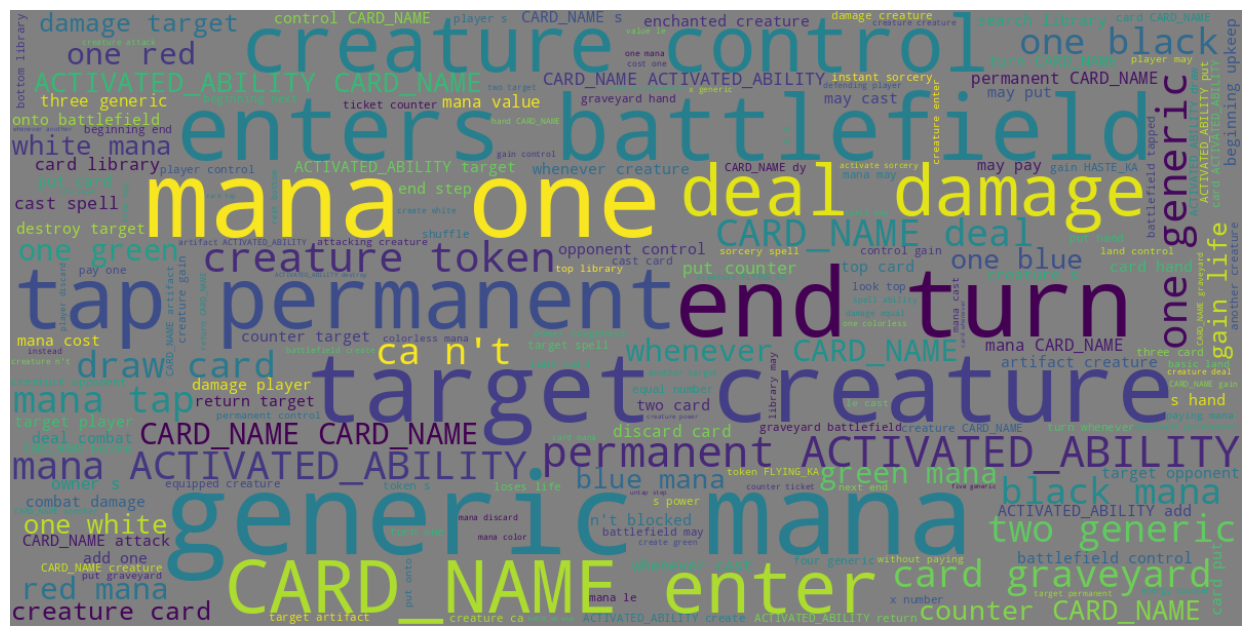

In [ ]:
plot.figure(figsize=(16, 8))
plot.imshow(wordcloud, interpolation="bilinear")
plot.axis('off')
plot.show()

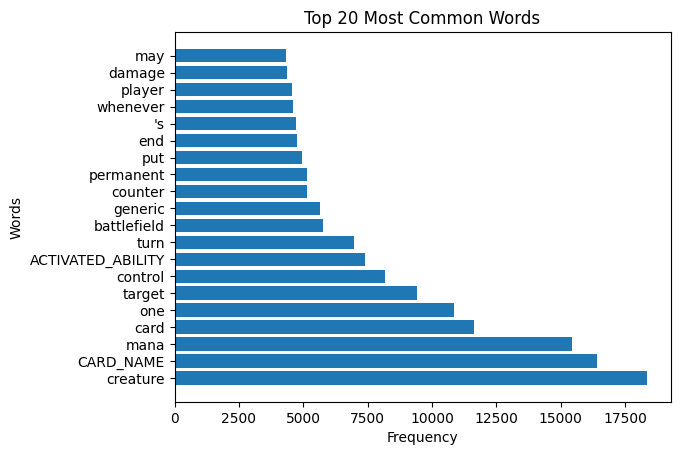

In [ ]:
from nltk import FreqDist
all_words = [word for words in data_to_analyse['lemmatized_text'] for word in words]

freq_dist = FreqDist(all_words)

top_n = 20
top_words = freq_dist.most_common(top_n)
words, frequencies = zip(*top_words)

plot.barh(words, frequencies)
plot.title('Top {} Most Common Words'.format(top_n))
plot.xlabel('Frequency')
plot.ylabel('Words')
plot.show()

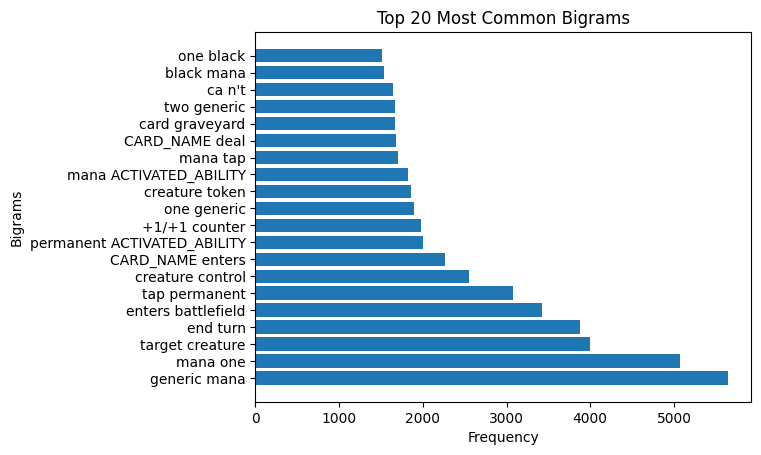

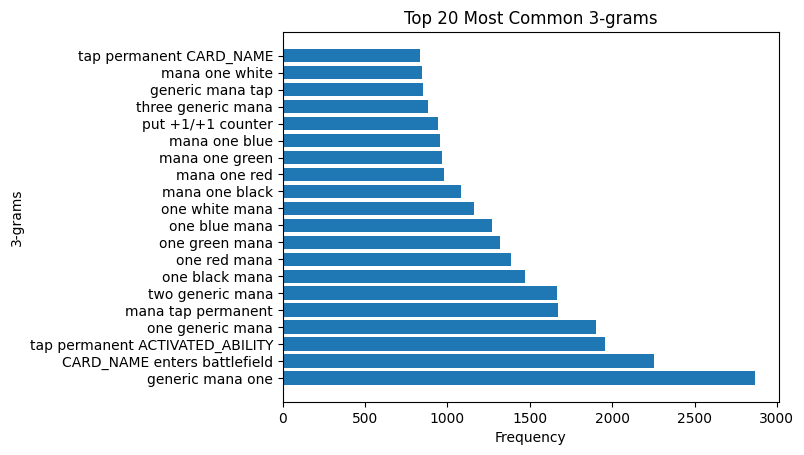

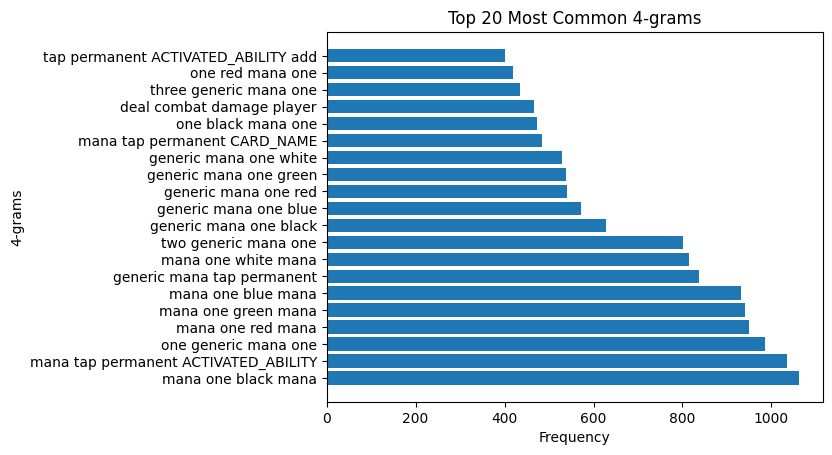

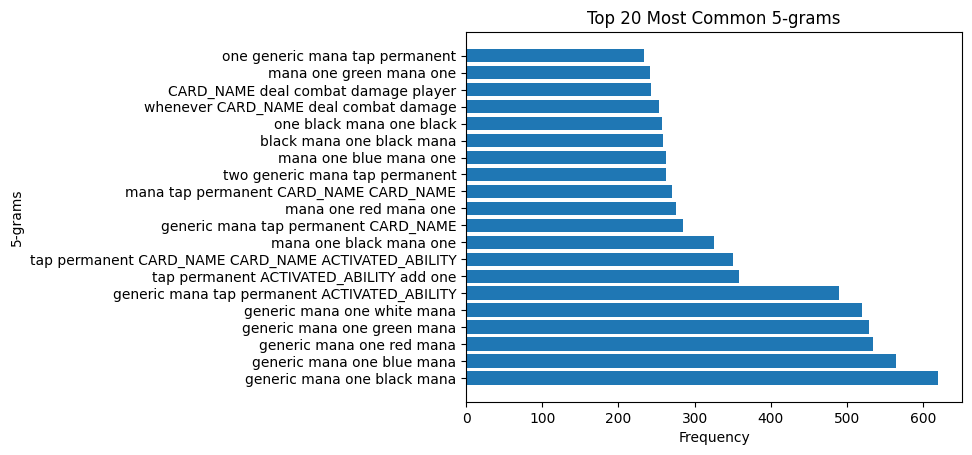

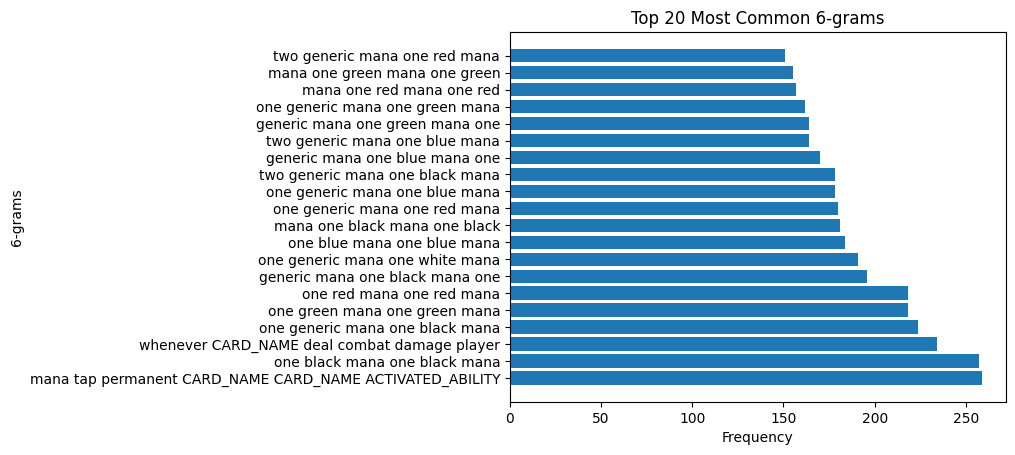

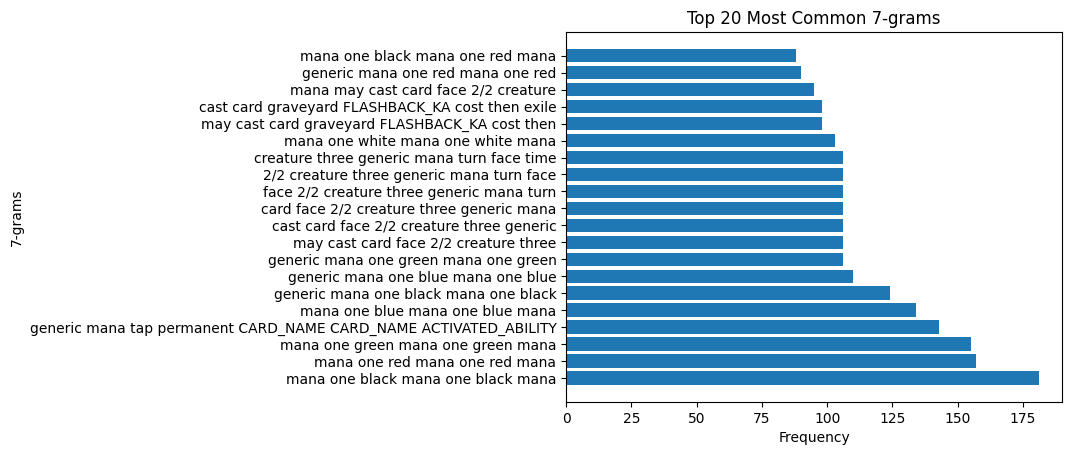

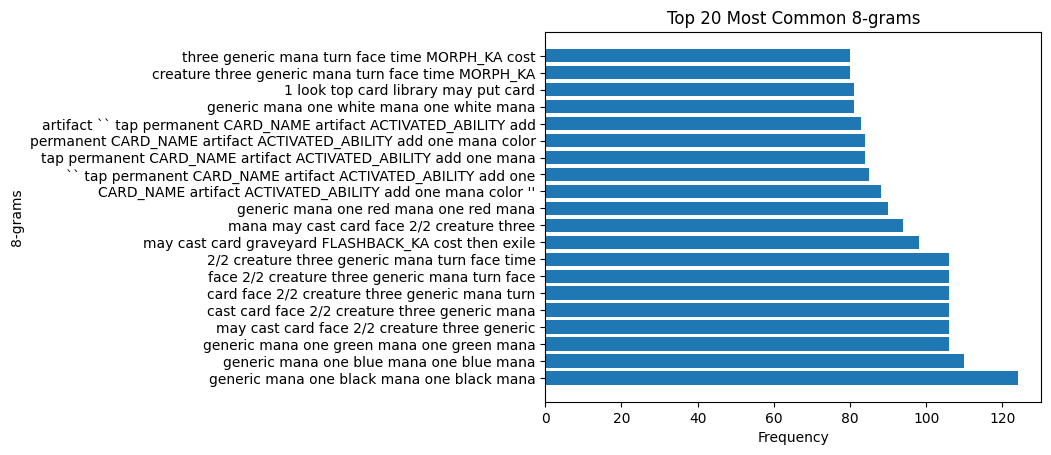

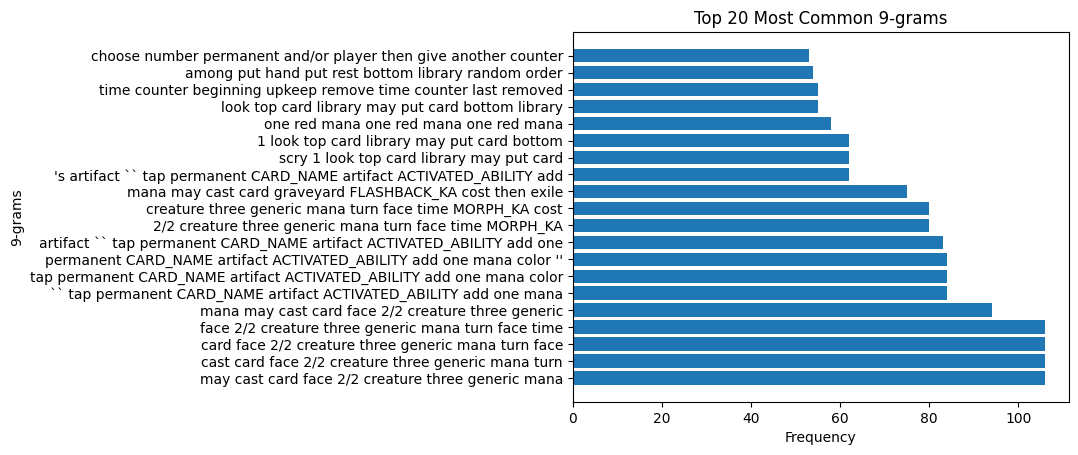

In [ ]:
from nltk import bigrams
from nltk import ngrams


# Extract bigrams and create a histogram for most common bigrams
all_bigrams = list(bigrams(all_words))
freq_dist_bigrams = FreqDist(all_bigrams)

top_n_bigrams = 20
top_bigrams = freq_dist_bigrams.most_common(top_n_bigrams)
bigram_labels, bigram_frequencies = zip(*top_bigrams)

plot.barh([' '.join(bigram) for bigram in bigram_labels], bigram_frequencies)  # Convert bigrams to string
plot.title('Top {} Most Common Bigrams'.format(top_n_bigrams))
plot.xlabel('Frequency')
plot.ylabel('Bigrams')
plot.show()

def generate_ngrams_and_plot(n):
    all_ngrams = list(ngrams(all_words, n))
    freq_dist_ngrams = FreqDist(all_ngrams)

    top_n_ngrams = 20
    top_ngrams = freq_dist_ngrams.most_common(top_n_ngrams)
    ngram_labels, ngram_frequencies = zip(*top_ngrams)

    plot.barh([' '.join(ngram) for ngram in ngram_labels], ngram_frequencies)
    plot.title(f'Top {top_n_ngrams} Most Common {n}-grams')
    plot.xlabel('Frequency')
    plot.ylabel(f'{n}-grams')
    plot.show()

# Generate histograms for trigrams, 4-grams, 5-grams, and 6-grams
for n in range(3, 10):
    generate_ngrams_and_plot(n)



Now I'll save all `oracle_text` to a csv.

In [ ]:
data_to_analyse.to_csv('analysed_text.csv', index=False, header=False)

## Fomalising a scripting language

The following grammar is a draft idea on how to formalise the MtG language used, it will definetely change.
For the standard used please follow this [link](https://en.wikipedia.org/wiki/Extended_Backus%E2%80%93Naur_form)

```ebnf
card_text = {paragraph};
paragraph = {sentence};
sentence = {word} | {phrase};
phrase = {ability} | {cost} {effect} | {cost} {effect} {ability};
ability = "Whenever" {condition} "," {effect} |
          "When" {condition} "," {effect} |
          "At" {condition} "," {effect} |
          {effect} "if" {condition} |
          {effect} "when" {condition} |
          {effect} "whenever" {condition};
condition = {event} ["that" {event}] | {comparison};
event = "you" ["control"] {verb} ["a" {object}] |
        "an" {object} {verb} ["you"] |
        {object} {verb} ["you"];
object = {card_name} | {card_type} | "creature" | "land" | "artifact" | "enchantment" | "planeswalker" | "battle";
verb = "enters" ["the" "battlefield"] |
       "leaves" ["the" "battlefield"] |
       "dies" | "is" ["put" "into" "a" "graveyard" | "exiled" | "destroyed" | "sacrificed"];
comparison = {number} {"greater than" | "greater or equal than" | "less than" | "less or equal than" | "equal to"} {number};
cost = {mana_cost} | {tap_cost} | {untap_cost} | {sacrifice_cost} | {discard_cost} | {life_cost};
effect = {ability_effect} | {spell_effect} | {mana_effect} | {damage_effect} | {life_effect} | {token_effect};
ability_effect = {keyword} | {ability_text};
spell_effect = {keyword} | {spell_text};
mana_effect = {keyword} | {mana_text};
damage_effect = {keyword} | {damage_text};
life_effect = {keyword} | {life_text};
token_effect = {create_token} | {token_text};
create_token = "create" {number} {token_name} "tokens" |
               "create" {number} "1/1" {color} "creature" "tokens" "with" {token_text};
token_name = {card_name} | {creature_type};
color = "white" | "blue" | "black" | "red" | "green";
ability_text = {text};
spell_text = {text};
mana_text = {text};
damage_text = {text};
life_text = {text};
token_text = {text};
mana_cost = "{" {mana_symbol} "}";
mana_symbol = "W" | "U" | "B" | "R" | "G" | "C" | "X" | {number};
tap_cost = "{T}";
untap_cost = "{Q}";
sacrifice_cost = "sacrifice" {card_name};
discard_cost = "discard" {number} {card_type};
life_cost = {number} "life";
card_name = {text}; (*strutturazione dei card name*)
card_type = {text};
creature_type = {text};
text = {word};
number = {digit} | {digit} {number};
digit = "0" | "1" | "2" | "3" | "4" | "5" | "6" | "7" | "8" | "9";
word = {letter};
letter = (* A, a, ... z, Z + tutti i caratteri speciali *)
```

The following paragraph is the new version of the EBNF grammar that will follow the idea of a scripting language for the Rule Engine. Currently WIP


From the comprehensive rules:


> 602. Activating Activated Abilities
>
> 602.1. Activated abilities have a cost and an effect. They are written as `[Cost]: [Effect.] [Activation instructions (if any).]`
>
>  1. 602.1a The activation cost is everything before the colon (:). An ability’s activation cost must be paid by the player who is activating it.
Example: The activation cost of an ability that reads “{2}, {T}: You gain 1 life” is two mana of any type plus tapping the permanent that has the ability.
>
>  2. 602.1b Some text after the colon of an activated ability states instructions that must be followed while activating that ability. Such text may state which players can activate that ability, may restrict when a player can activate the ability, or may define some aspect of the activation cost. This text is not part of the ability’s effect. It functions at all times. If an activated ability has any activation instructions, they appear last, after the ability’s effect.
>
>  3. 602.1c An activated ability is the only kind of ability that can be activated. If an object or rule refers to activating an ability without specifying what kind, it must be referring to an activated ability.
>
>  4. 602.1d Previously, the action of using an activated ability was referred to on cards as “playing” that ability. Cards that were printed with that text have received errata in the Oracle card reference so they now refer to “activating” that ability.
>
> 602.2. To activate an ability is to put it onto the stack and pay its costs, so that it will eventually resolve and have its effect. Only an object’s controller (or its owner, if it doesn’t have a controller) can activate its activated ability unless the object specifically says otherwise. Activating an ability follows the steps listed below, in order. If, at any point during the activation of an ability, a player is unable to comply with any of those steps, the activation is illegal; the game returns to the moment before that ability started to be activated (see rule 728, “Handling Illegal Actions”). Announcements and payments can’t be altered after they’ve been made.
>
> 1. 602.2a The player announces that they are activating the ability. If an activated ability is being activated from a hidden zone, the card that has that ability is revealed. That ability is created on the stack as an object that’s not a card. It becomes the topmost object on the stack. It has the text of the ability that created it, and no other characteristics. Its controller is the player who activated the ability. The ability remains on the stack until it’s countered, it resolves, or an effect moves it elsewhere.
>
> 2. 602.2b The remainder of the process for activating an ability is identical to the process for casting a spell listed in rules 601.2b–i. Those rules apply to activating an ability just as they apply to casting a spell. An activated ability’s analog to a spell’s mana cost (as referenced in rule 601.2f) is its activation cost.
>
> 602.3. Some abilities specify that one of their controller’s opponents does something the controller would normally do while it’s being activated, such as choose a mode or choose targets. In these cases, the opponent does so when the ability’s controller normally would do so.
>
> 1. 602.3a If there is more than one opponent who could make such a choice, the ability’s controller decides which of those opponents will make the choice.
>
> 2. 602.3b If the ability instructs its controller and another player to do something at the same time as the ability is being activated, the ability’s controller goes first, then the other player. This is an exception to rule 101.4.
>
> 602.4. Activating an ability that alters costs won’t affect spells and abilities that are already on the stack.
>
> 602.5. A player can’t begin to activate an ability that’s prohibited from being activated.
>
> 1. 602.5a A creature’s activated ability with the tap symbol ({T}) or the untap symbol ({Q}) in its activation cost can’t be activated unless the creature has been under its controller’s control since the start of their most recent turn. Ignore this rule for creatures with haste (see rule 702.10).
>
> 2. 602.5b If an activated ability has a restriction on its use (for example, “Activate only once each turn”), the restriction continues to apply to that object even if its controller changes.
>
> 3. 602.5c If an object acquires an activated ability with a restriction on its use from another object, that restriction applies only to that ability as acquired from that object. It doesn’t apply to other, identically worded abilities.
>
> 4. 602.5d Activated abilities that read “Activate only as a sorcery” mean the player must follow the timing rules for casting a sorcery spell, though the ability isn’t actually a sorcery. The player doesn’t actually need to have a sorcery card that they could cast.
>
> 5. 602.5e Activated abilities that read “Activate only as an instant” mean the player must follow the timing rules for casting an instant spell, though the ability isn’t actually an instant. The player doesn’t actually need to have an instant card that they could cast.

#### Activated Ability
```ebnf
activated_ability = "activated_ability(" {cost} "," {effect} ")" terminal_instruction;

effect = {discard_effect} | {sacrifice_effect} | {untap_effect} | {tap_effect};

cost = {mana_cost} | {tap_cost} | {untap_cost} | {sacrifice_cost} |
       {discard_cost} | {life_cost} | {loyalty_cost} | {counter_removal} |
       {exile_cost} | {counter_addition};


tap_cost = tap_effect;
untap_cost = untap_effect;

sacrifice_cost = "sacrifice(" target_permanent "," filter_condition ")" |
                 "sacrifice(" {target_permanent} "," filter_condition ")" ;

```

Let's as example the whole part of the comprehensive rules regarding the discard action:

> **701.8.** Discard
>  - **701.8a** To discard a card, move it from its owner’s hand to that player’s graveyard.
>  - **701.8b** By default, effects that cause a player to discard a card allow the affected player to choose
which card to discard. Some effects, however, require a random discard or allow another player
to choose which card is discarded.
>  - **701.8c** If a card is discarded, but an effect causes it to be put into a hidden zone instead of into its
owner’s graveyard without being revealed, all values of that card’s characteristics are
considered to be undefined. If a card is discarded this way to pay a cost that specifies a
characteristic about the discarded card, that cost payment is illegal; the game returns to the
moment before the cost was paid (see rule 728, “Handling Illegal Actions”).

```ebnf
discard_cost = "discard(" target_card  ")" |
               "discard(" {target_card} ")" |
               "discard(" {target_card} "," filter_condition ")" |
               "discard(" card_number "," {target_card} "," filter_condition ")";

discard_effect = discard_cost |
                 "discard(" target_player "," card_number "," {target_card} "," filter_condition ")";
```
Let's see some examples of activated abilities:

| |
|:--|
| Remove a +1/+1 counter from CARD_NAME: It deals 1 damage to any target.|
| Tap three untapped Merfolk you control: Draw a card. |
| {T}: Add {B} or {G}. |
| {2}{B}, {T}, Exile CARD_NAME: Until end of turn, you may play lands and cast spells from your graveyard. If a card would be put into your graveyard from anywhere this turn, exile that card instead. |
| Sacrifice another creature or artifact: Put a +1/+1 counter on CARD_NAME.  |


```ebnf



sacrifice_effect = sacrifice_cost |
                   "sacrifice(" target_player "," target_permanent "," filter_condition ")" |
                   "sacrifice(" target_player "," {target_permanent} "," filter_condition ")";

untap_effect = "untap(" target_permanent "," filter_condition ")" |
               "untap(" {target_permanent} "," filter_condition  ")";

tap_effect = "tap(" target_permanent "," filter_condition ")" |
             "tap(" {target_permanent} "," filter_condition  ")";


target = {target_permanent} | {target_player} | {target_spell} | {target_ability};

target_player = "this_player" | "other_player" | "all_players" | "any_player";

target_permanent = "this_permanent" | "other_permanent" | "all_permanent" | "any_permanent";

target_card = "this_card" | "any_card" | "hand";

filter_condition = {comparison_expression};

comparison_expression = value comparison_operator value;

comparison_operator = "==" | "!=" | "<" | ">" | "<=" | ">=" | "is" | "in";

value = (*qualsiasi argomento di riferimento*)

terminal_instruction = ";"
```


#### Mana Cost
```ebnf
mana_cost = "{" mana_symbol "}" |
            "{" mana_symbol "/" mana_symbol "}" |
            "{" mana_symbol "/" mana_symbol "/" phyrexian_symbol "}" ;

phyrexian_symbol = "P";
tap_cost = "{T}";
untap_cost = "{Q}";

mana_symbol = "W" | "U" | "B" | "R" | "G" | "C" | "X" | {number};
```

Let's identify an example for each mana cost:
1. `{R}` -> <img width=20  src="https://svgs.scryfall.io/card-symbols/R.svg"></img> means you have to pay one red mana.
2. `{2/W}`, `{G/B}` -> <img width=20  src="https://svgs.scryfall.io/card-symbols/2W.svg"></img> <img width=20  src="https://svgs.scryfall.io/card-symbols/BG.svg"></img> mean that you can pay with two colorless mana or just one white mana, you can pay with one black mana or one green mana.
2. `{G/B/P}` -> <img width=20  src="https://svgs.scryfall.io/card-symbols/BGP.svg"></img> means you can pay with one black mana or one green mana or 2 Hit Points (life or simply HP).

## Fuction Definition

#### fuctions for cards

In [ ]:
def is_multi_faced(row):
  return is_double_faced(row) or is_flip(row) or is_split(row) or is_adventure(row)

def is_saga(row):
  return 'saga' in row['layout'].lower()

def is_adventure(row):
  return 'adventure' in row['layout'].lower()

def is_prototype(row):
  return 'prototype' in row['layout'].lower()

def is_class(row):
  return 'class' in row['layout'].lower()

def is_leveler(row):
  return 'leveler' in row['layout'].lower()

def is_split(row):
  return 'split' in row['layout'].lower()

def is_double_faced(row):
  return is_transform(row) or is_modal_dfc(row)

def is_flip(row):
  return 'flip' in row['layout'].lower()

def is_meld(row):
  return 'meld' in row['layout'].lower()

def is_transform(row):
  return 'transform' in row['layout'].lower()

def is_modal_dfc(row):
  return 'modal_dfc' in row['layout'].lower()

def is_vanilla(row):
  return is_creature(row['type_line']) and is_null_or_empty(row['oracle_text']) and has_normal_layout(row)

def has_normal_layout(row):
  return 'normal' in row['layout'].lower()

def is_permanent_card(row):
  return (is_artifact_card(row)
          or is_creature_card(row)
          or is_enchantment_card(row)
          or is_land_card(row)
          or is_planeswalker_card(row)
          or is_battle_card(row))

def is_nonpermanent_card(row):
  return (is_instant_card(row)
          or is_sorcery_card(row))

def is_planeswalker_card(row):
  return is_planeswalker(row['type_line'])

def is_sorcery_card(row):
  return is_sorcery(row['type_line'])

def is_instant_card(row):
  return is_instant(row['type_line'])

def is_enchantment_card(row):
  return is_enchantment(row['type_line'])

def is_creature_card(row):
  return is_creature(row['type_line'])

def is_land_card(row):
  return is_land(row['type_line'])

def is_artifact_card(row):
  return is_artifact(row['type_line'])

def is_basic_land_card(row):
  return is_basic_land(row['type_line'])

def is_battle_card(row):
  return is_battle(row['type_line'])

def is_battle(type_line):
  return 'battle' in type_line.lower()

def is_basic_land(type_line):
  return 'basic' in type_line.lower() and 'land' in type_line.lower()

def is_artifact(type_line):
  return 'artifact' in type_line.lower()

def is_land(type_line):
  return 'land' in type_line.lower()

def is_planeswalker(type_line):
  return 'planeswalker' in type_line.lower()

def is_sorcery(type_line):
  return 'sorcery' in type_line.lower()

def is_instant(type_line):
  return 'instant' in type_line.lower()

def is_enchantment(type_line):
  return 'enchantment' in type_line.lower()

def is_creature(type_line):
  return 'creature' in type_line.lower()

#### other functions

In [ ]:
def is_null_or_empty(input_string):
    return input_string is None or input_string == ''


Old stuff to try to replace the card names.

In [ ]:
filtered_df = df[~df['oracle_text'].isna()]

card_names = filtered_df[filtered_df['legalities'].apply(lambda x: x.get('vintage', '') == 'legal')].sort_values('name', ascending=True)['name']

raw_oracle_text = filtered_df['oracle_text']

for card_name in card_names:
    escaped_card_name = re.escape(card_name)
    mask = raw_oracle_text.str.contains(fr'\b{escaped_card_name}\b', regex=True)

    if mask.any():
        matching_indexes = filtered_df[mask].index
        print(f"{card_name} is contained as a whole word in the following rows with index: {matching_indexes}")

In [ ]:
# sed -i 's|$(cat card_names.txt | sed 's/$/\\|/' | tr -d '\n')'|CARD_NAME|g' raw_oracle_text.csv
sed_command = "sed -i 's|" + "$(cat card_names.txt | sed 's/$/\\|/' | tr -d '\n')" + "|CARD_NAME|g' raw_oracle_text.csv"

with open('replace.sed', 'w') as f:
    f.write(sed_command)


In [ ]:
!sed 's/.*/s\/&\/\bCARD_NAME\b\/g/' card_names.txt > replace_cards.sed

In [ ]:
!sed -n '/card name/p' replace_cards.sed

In [ ]:
!sed -E -f replace_cards.sed raw_oracle_text.csv > processed_oracle_text.csv

In [ ]:
card_names

In [ ]:
df.head()